<a href="https://colab.research.google.com/github/minlew/Analysing-the-Space-Race/blob/main/Analysing_the_Space_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

Install statements

In [ ]:
%pip install iso3166  # Package with country codes
%pip install --upgrade plotly  # Needed for Google Colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

Notebook Presentation

In [ ]:
# Control how many decimals Pandas will print numbers with.
pd.options.display.float_format = '{:,.2f}'.format

Load the Data

In [ ]:
df_raw = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_raw`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Peek at the top 5 rows of the dataframe
df_raw.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
# See number of rows and columns of dataframe
df_raw.shape

(4324, 9)

In [ ]:
# See names of columns
df_raw.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
# Figure out if there is any missing or junk data in the dataframe
df_raw.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [ ]:
# Check for duplicated rows
df_raw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
# Remove unwanted columns
df_columned = df_raw.drop(columns=["Unnamed: 0.1","Unnamed: 0"])
df_columned.shape

(4324, 7)

In [ ]:
# Check for duplicated rows
df_columned.duplicated().value_counts()

False    4323
True        1
dtype: int64

It can be seeen that there is one instance of a duplicated row.

In [ ]:
# Drop any duplicates
df_deduplicated = df_columned.drop_duplicates()
df_deduplicated.shape

(4323, 7)

In [ ]:
# Clean the dataframe
df_price = df_deduplicated.dropna()
df_price.shape

(963, 7)

df_price will be used for analysis pertaining to prices.

df_deduplicated will be used for analysis pertaining to anything else.

## Descriptive Statistics

In [ ]:
# Return basic descriptive statistics
df_deduplicated.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


This shows a few interesting insights.

There are 4323 recorded rocket launches (963 of which have a valid "price" entry).

The organisation that has launched the most rockets is "Strategic Rocket Forces of the Russian Federation" or "RVSN" at an impressive 1777.

The most used site for launch rockets is Site 31/6, Baikonur Cosmodrome, Kazakhstan, frim which 235 rockets have been launched.

89.7% of rocket launches are successful. That means over 10% aren't!

# Number of Launches per Company

In [ ]:
# Group the rows by "Organisation".
df_organisation = df_deduplicated.value_counts(subset="Organisation")
print(df_organisation)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ISA                   13
Rocket Lab            13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
Land Launch            7
MITT                   7
JAXA                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Exos                   4
Arm??e de l'

In [ ]:
# This has revealed a typo in one of the organisation names: "Arm??e de l'Air" should say "Armee de l'Air".
df_organisation = df_organisation.rename(index={"Arm??e de l'Air":"Armee de l'Air"})

<BarContainer object of 56 artists>

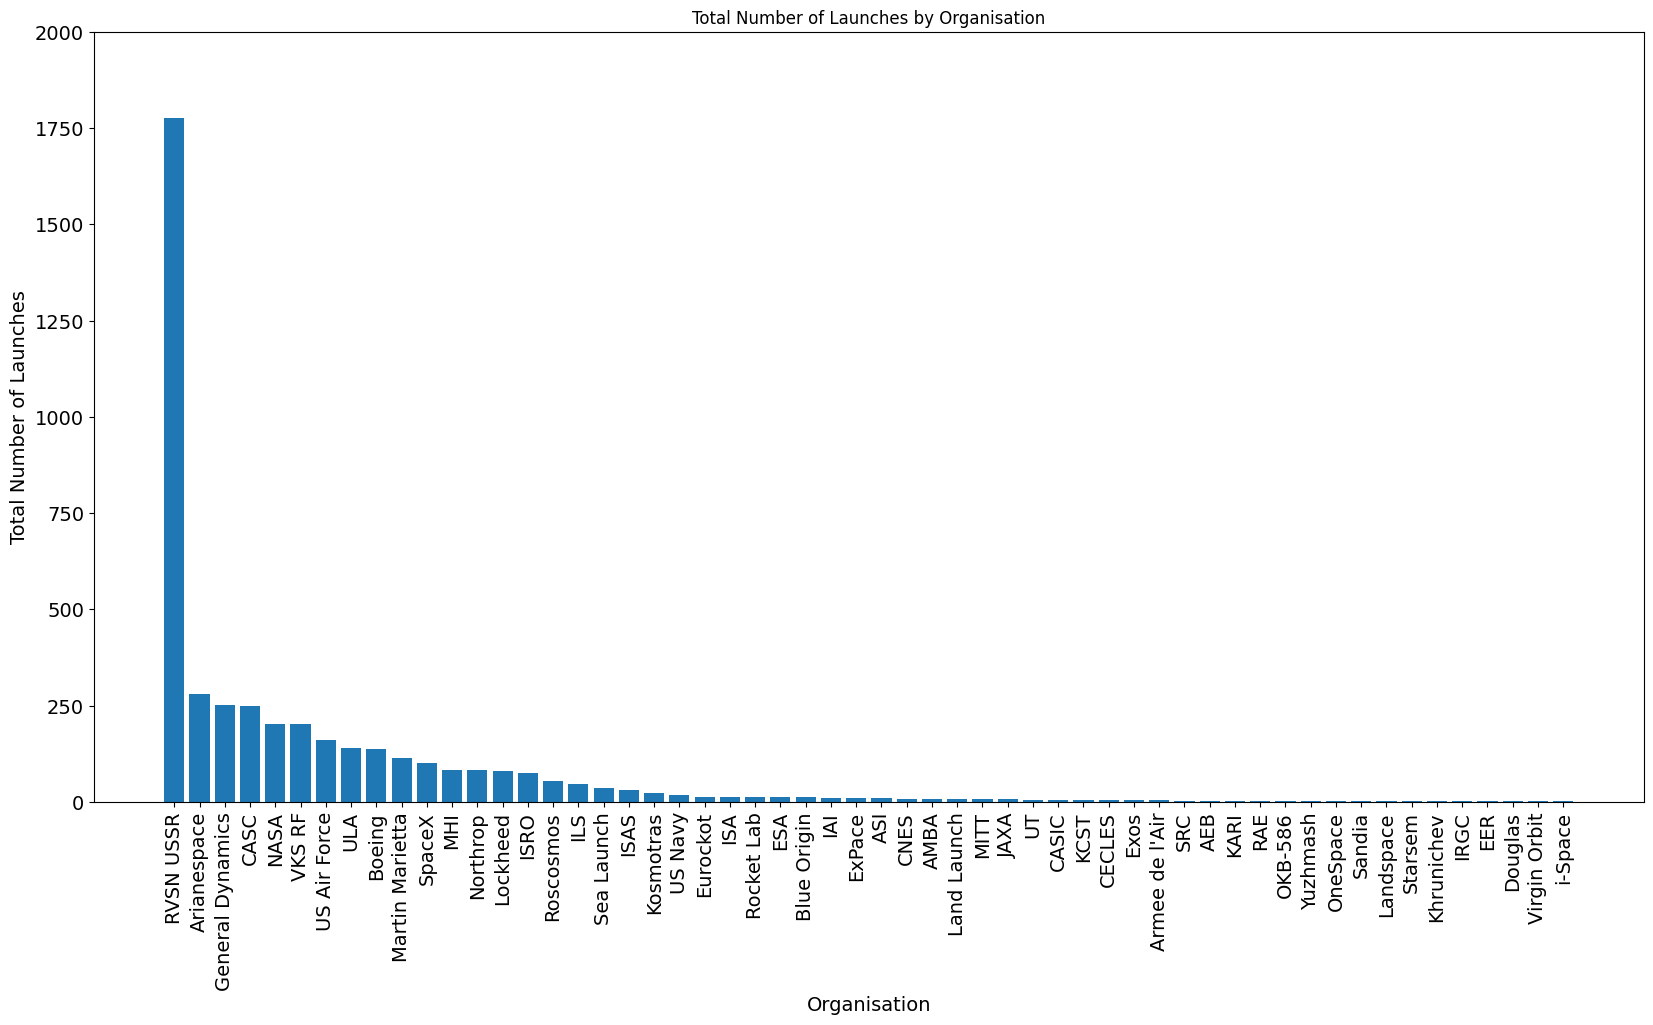

In [ ]:
# Plot a bar chart showing the number of launches per company.
plt.figure(figsize=(20,10))
plt.title("Total Number of Launches by Organisation")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Organisation", fontsize=14)
plt.ylabel("Total Number of Launches", fontsize=14)
plt.ylim(0,2000)
plt.bar(df_organisation.index, df_organisation.to_list())

The USSR has an overwhelming share of the total launches.

However, this is due to the fact that this was the only russian space program for many decades.

If all individual US-based companies summed their launches, the numbers would be more comparable.

# Number of Active versus Retired Rockets

In [ ]:
# Group the rows by "Rocket_Status".
rocket_status_data = df_deduplicated.value_counts(subset="Rocket_Status")
print(rocket_status_data)

Rocket_Status
StatusRetired    3534
StatusActive      789
dtype: int64


# Distribution of Mission Status

In [ ]:
# Group the rows by "Mission_Status".
df_mission_status = df_deduplicated.value_counts(subset="Mission_Status")
print(df_mission_status)

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
dtype: int64


# How Expensive are the Launches?

In [ ]:
# Remove commmas from all entries in the "Price" column.
df_price.Price = df_price.Price.astype(str).str.replace(',', "")

<ipython-input-22-b715c50d63a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.Price = df_price.Price.astype(str).str.replace(',', "")


In [ ]:
# Convert all entries in the "Price" column to floats
df_price.Price = pd.to_numeric(df_price.Price)

<ipython-input-23-4ce335861af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.Price = pd.to_numeric(df_price.Price)


(array([408., 200., 100.,  93.,   0.,   0.,  11.,   0., 136.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([   5.3  ,   55.247,  105.194,  155.141,  205.088,  255.035,
         304.982,  354.929,  404.876,  454.823,  504.77 ,  554.717,
         604.664,  654.611,  704.558,  754.505,  804.452,  854.399,
         904.346,  954.293, 1004.24 , 1054.187, 1104.134, 1154.081,
        1204.028, 1253.975, 1303.922, 1353.869

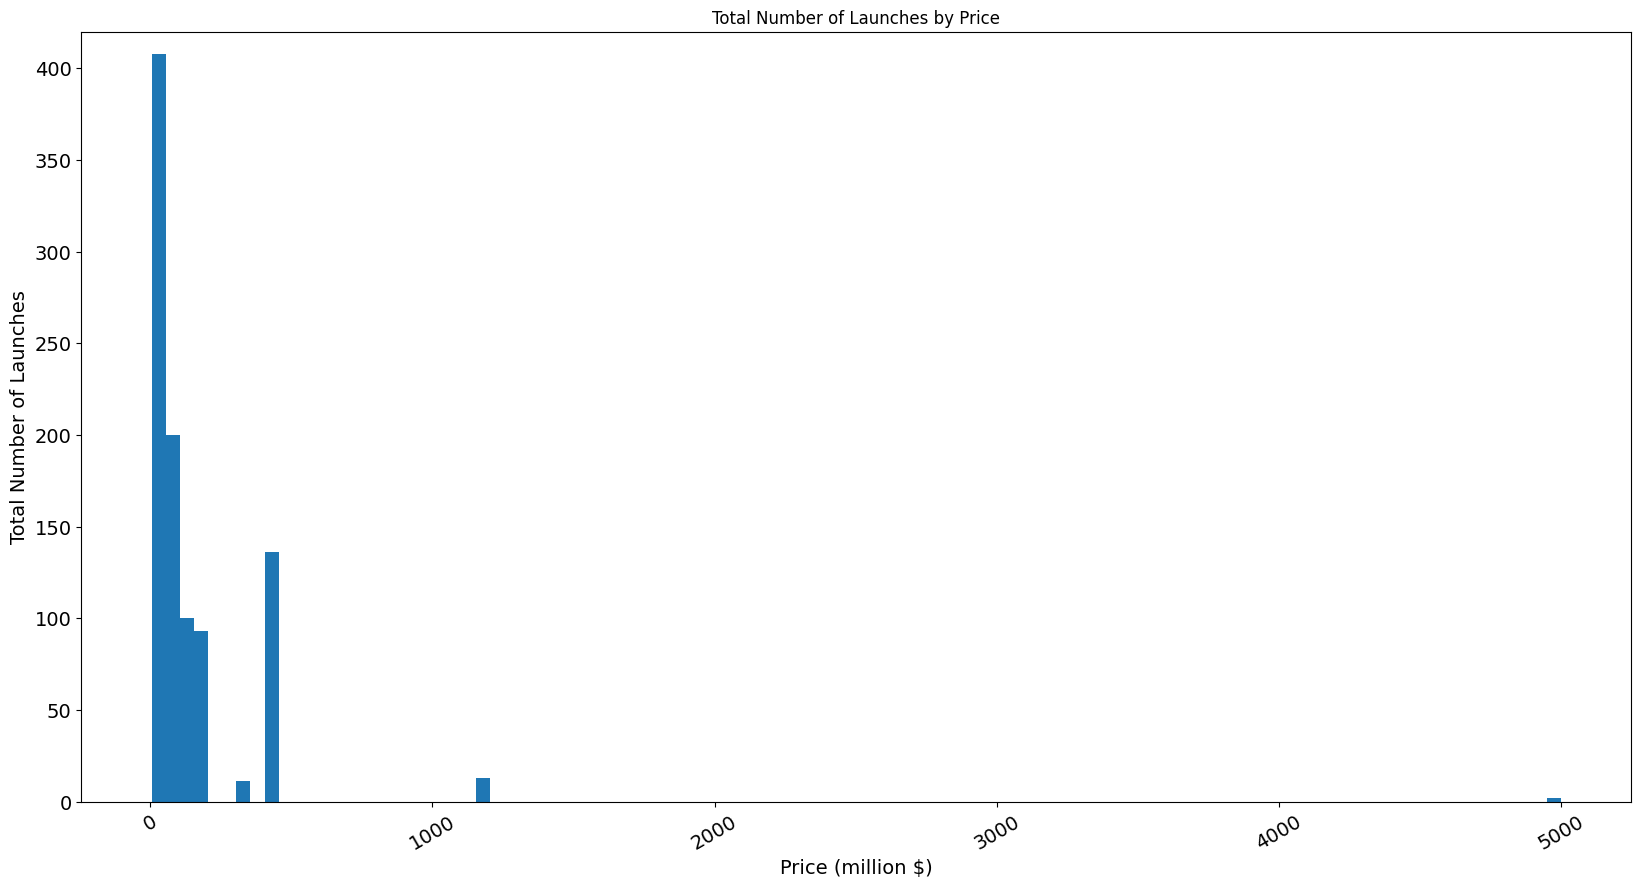

In [ ]:
# Plot a histogram showing the number of launches per cost band.
plt.figure(figsize=(20,10))
plt.title("Total Number of Launches by Price")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price (million $)", fontsize=14)
plt.ylabel("Total Number of Launches", fontsize=14)
plt.ylim(0,420)
plt.hist(df_price.Price, bins=100)

This result shows that most rockets cost under 0.5 billion USD.

However there do exists outlier rocket launches costing as much as 5 billion USD.

So we will plot again but take a closer look at the larg cluster of prices.

(array([  0.,  28.,   1.,   1.,  18.,  92.,  60.,  33.,  86.,  54.,  34.,
         43.,  79.,  33.,   0.,   0.,   7.,   7.,  32.,   0.,   0.,  37.,
          9.,   6.,  15.,   0.,   6.,   6.,   3.,   7.,  11.,   0.,  15.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,  75.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 136.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 23

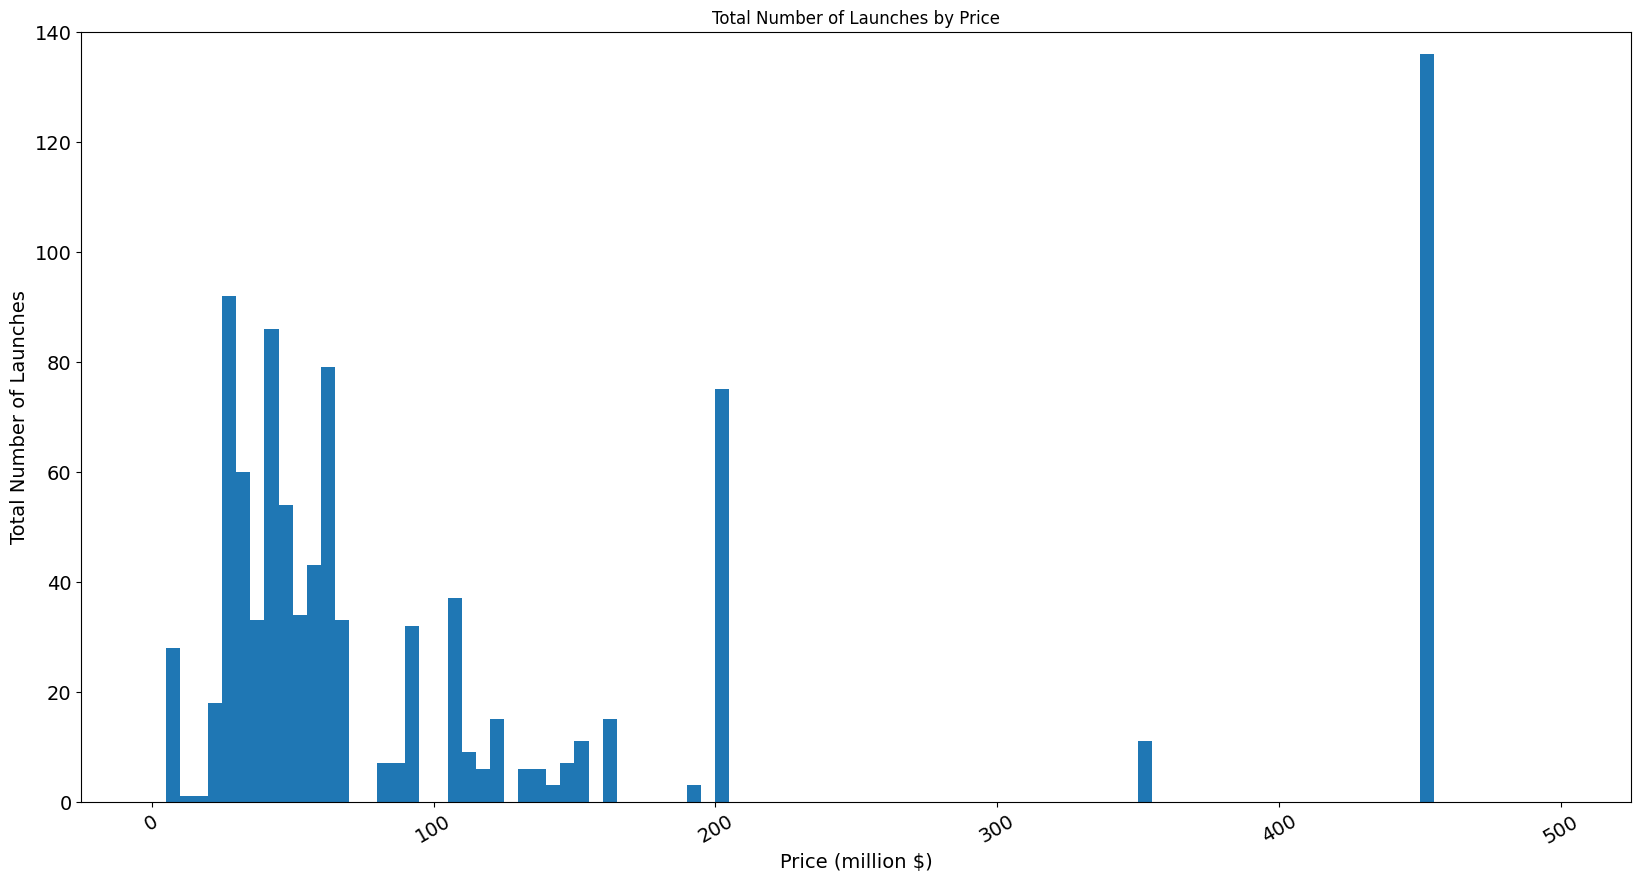

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Total Number of Launches by Price")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Price (million $)", fontsize=14)
plt.ylabel("Total Number of Launches", fontsize=14)
plt.ylim(0,140)
plt.hist(df_price.Price, bins=100, range=[0,500])

# Number of Launches by Country

ISO 3166-1 defines two-letter, three-letter, and three-digit country codes.

python-iso3166 is a self-contained module that converts between these codes and the corresponding country name.

These country codes are required for a choropleth map

In [ ]:
# In the "Location" column, the last word of every entry is the country.
# So make a new column extracting this last word.
df_deduplicated["Country"] = df_deduplicated["Location"].str.split().str[-1]

<ipython-input-26-a83ace3fbbef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduplicated["Country"] = df_deduplicated["Location"].str.split().str[-1]


In [ ]:
df_country = df_deduplicated.value_counts(subset="Country")
print(df_country)

Country
Russia        1395
USA           1344
Kazakhstan     701
France         303
China          267
Japan          126
India           76
Ocean           36
Zealand         13
Iran            13
Israel          11
Kenya            9
Korea            8
Australia        6
Mexico           4
Sea              4
Brazil           3
Canaria          2
Facility         1
Site             1
dtype: int64


Some of these are not countries: E.g. "Sea", "Facility", etc.

Let's investigate these individually

In [ ]:
df_deduplicated.loc[df_deduplicated['Country'] == "Ocean"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
556,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Sat May 24, 2014 21:09 UTC",Zenit-3 SL | Eutelsat-3B,StatusActive,NaN,Success,Ocean
617,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Fri Feb 01, 2013 06:55 UTC",Zenit-3 SL | Intelsat-27,StatusActive,NaN,Failure,Ocean
625,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Mon Dec 03, 2012 20:43 UTC",Zenit-3 SL | Eutelsat-70B,StatusActive,NaN,Success,Ocean
636,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Sun Aug 19, 2012 06:54 UTC",Zenit-3 SL | Intelsat-21,StatusActive,NaN,Success,Ocean
645,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Fri Jun 01, 2012 05:22 UTC",Zenit-3 SL | Intelsat-19,StatusActive,NaN,Success,Ocean
671,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Sat Sep 24, 2011 20:17 UTC",Zenit-3 SL | Atlantic Bird 7,StatusActive,NaN,Success,Ocean
773,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Mon Apr 20, 2009 08:15 UTC",Zenit-3 SL | Sicral-1B,StatusActive,NaN,Success,Ocean
802,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Wed Sep 24, 2008 09:27 UTC",Zenit-3 SL | Galaxy 19,StatusActive,NaN,Success,Ocean
810,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Wed Jul 16, 2008 05:20 UTC",Zenit-3 SL | EchoStar XI,StatusActive,NaN,Success,Ocean
820,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean","Wed May 21, 2008 09:42 UTC",Zenit-3 SL | Galaxy 18,StatusActive,NaN,Success,Ocean


It can be seen that every instance of "Ocean" refers to the Kiritimati Launch Area in the Pacific Ocean.

These instances will be renamed to the country "Kiribati".

In [ ]:
df_deduplicated = df_deduplicated.replace({"Ocean":"Kiribati"})

In [ ]:
df_deduplicated.loc[df_deduplicated['Country'] == "Mexico"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
91,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Oct 26, 2019 17:40 UTC",SARGE | Launch 4,StatusActive,NaN,Failure,Mexico
127,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Jun 29, 2019 18:00 UTC",SARGE | Launch 3,StatusActive,NaN,Partial Failure,Mexico
157,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Mar 02, 2019 17:45 UTC",SARGE | Launch 2,StatusActive,NaN,Partial Failure,Mexico
219,Exos,"Vertical Launch Area, Spaceport America, New M...","Sat Aug 25, 2018 18:15 UTC",SARGE | Launch 1,StatusActive,NaN,Partial Failure,Mexico


It can be seen that every instance of "Mexico" refers to "New Mexico" which is a US state.

In [ ]:
df_deduplicated = df_deduplicated.replace({"Mexico":"USA"})

In [ ]:
df_deduplicated.loc[df_deduplicated['Country'] == "Sea"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
133,CASC,"Tai Rui Barge, Yellow Sea","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.3,Success,Sea
920,SRC,"K-84 Submarine, Barents Sea Launch Area, Baren...","Fri May 26, 2006 18:50 UTC",Shtil' | Kompass-2,StatusRetired,NaN,Success,Sea
957,SRC,"K-496 Submarine, Barents Sea Launch Area, Bare...","Tue Jun 21, 2005 19:46 UTC",Volna | Cosmos 1,StatusRetired,NaN,Failure,Sea
1304,SRC,"K-407 Submarine, Barents Sea Launch Area, Bare...","Tue Jul 07, 1998 03:15 UTC",Shtil' | Tubsat,StatusRetired,NaN,Success,Sea


It can be seen that instances of "Sea" come from either "Yellow Sea" or "Barents Sea".

"Yellow Sea" will be recategorised as "China", and "Barents Sea" will be recategorised as "Russia".

In [ ]:
df_deduplicated.loc[133,"Country"] = "China"
df_deduplicated.loc[920,"Country"] = "Russia"
df_deduplicated.loc[957,"Country"] = "Russia"
df_deduplicated.loc[1304,"Country"] = "Russia"

In [ ]:
df_deduplicated.loc[df_deduplicated['Country'] == "Canaria"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1378,Northrop,"Stargazer, Base Aerea de Gando, Gran Canaria","Fri Aug 01, 1997 20:20 UTC",Pegasus XL | OrbView-2,StatusActive,40.0,Success,Canaria
1393,Northrop,"Stargazer, Base Aerea de Gando, Gran Canaria","Mon Apr 21, 1997 11:59 UTC",Pegasus XL | MiniSat & Celestis space burial,StatusActive,40.0,Success,Canaria


It can be seen that instances of "Canaria" refer to "Gran Canaria".

Launches from here will be recategorised as "USA".

In [ ]:
df_deduplicated = df_deduplicated.replace({"Canaria":"USA"})

In [ ]:
df_deduplicated.loc[df_deduplicated['Country'] == "Facility"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
481,Sandia,"LP-41, Kauai, Pacific Missile Range Facility","Wed Nov 04, 2015","Super Stripy | HiakaSat, STACEM & Others",StatusActive,15.0,Failure,Facility


It can be seen that "Facility" refers to "Pacific Missile Range Facility".

Launches from here will be recategorised as "USA".

In [ ]:
df_deduplicated = df_deduplicated.replace({"Facility":"USA"})

In [ ]:
df_deduplicated.loc[df_deduplicated['Country'] == "Site"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
35,IRGC,"Launch Plateform, Shahrud Missile Test Site","Wed Apr 22, 2020 03:59 UTC",Qased | Noor 1,StatusActive,NaN,Success,Site


It can be seen that "Site" refers to "Shahrud Missile Test Site".

Launches from here will be recategorised as "Iran".

In [ ]:
df_deduplicated = df_deduplicated.replace({"Site":"Iran"})

In [ ]:
# To work with ISO codes, "Russia" should be "Russian Federation"
df_deduplicated = df_deduplicated.replace({"Russia":"Russian Federation"})
# "Zealand" should be "New Zealand"
df_deduplicated = df_deduplicated.replace({"Zealand":"New Zealand"})
# "Iran" should be "Iran, Islamic Republic of"
df_deduplicated = df_deduplicated.replace({"Iran":"Iran, Islamic Republic of"})
# And "Korea" should be "Korea, Republic of"
df_deduplicated = df_deduplicated.replace({"Korea":"Korea, Republic of"})

In [ ]:
# Corrected df_country
df_country = df_deduplicated.value_counts(subset="Country")
print(df_country)

Country
Russian Federation           1398
USA                          1351
Kazakhstan                    701
France                        303
China                         268
Japan                         126
India                          76
Kiribati                       36
Iran, Islamic Republic of      14
New Zealand                    13
Israel                         11
Kenya                           9
Korea, Republic of              8
Australia                       6
Brazil                          3
dtype: int64


In [ ]:
# Convert country names to ISO codes
df_deduplicated['Country'] = df_deduplicated['Country'].apply(lambda x: countries.get(x)[2])

In [ ]:
df_deduplicated.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [ ]:
# Create a data frame with the number of occurences of each country code
df_country_code = df_deduplicated.groupby(["Country"]).agg({"Country":"count"})
print(df_country_code)

         Country
Country         
AUS            6
BRA            3
CHN          268
FRA          303
IND           76
IRN           14
ISR           11
JPN          126
KAZ          701
KEN            9
KIR           36
KOR            8
NZL           13
RUS         1398
USA         1351


In [ ]:
# Leave index as "Country", rename column as "Launches"
df_country_code = df_country_code.rename(columns={"Country":"Launches"})

In [ ]:
df_country_code

,Launches
Country,
AUS,6
BRA,3
CHN,268
FRA,303
IND,76
IRN,14
ISR,11
JPN,126
KAZ,701


In [ ]:
fig1 = px.choropleth(
    df_country_code, # Use newly made dataframe as data
    locations = df_country_code.index, # Pass index itself as an argument
    color = "Launches",
    title = "Total Launches by Country",
    scope = "world",
    width = 1700,
    height = 900,
    color_continuous_scale = px.colors.sequential.matter,
    labels = {"Launches":"Total Launches"})

fig1.show()

Unsurprisingly, Russia and the USA have by far the most launches.

What is surprising however (at least to me) is that Kazakhstan comes in third with over 700 launches!

# Number of Failures by Country


In [ ]:
# Group data by country code and then subgroup by mission status
df_mission_status = df_deduplicated.groupby(["Country","Mission_Status"]).agg({"Country":"count"})
df_mission_status = df_mission_status.rename(columns={"Country":""})
print(df_mission_status)

                               
Country Mission_Status         
AUS     Failure               3
        Success               3
BRA     Failure               2
        Prelaunch Failure     1
CHN     Failure              19
        Partial Failure       6
        Success             243
FRA     Failure              13
        Partial Failure       5
        Success             285
IND     Failure               8
        Partial Failure       5
        Success              63
IRN     Failure               8
        Prelaunch Failure     1
        Success               5
ISR     Failure               2
        Success               9
JPN     Failure              10
        Partial Failure       3
        Success             113
KAZ     Failure              72
        Partial Failure      20
        Prelaunch Failure     1
        Success             608
KEN     Success               9
KIR     Failure               3
        Success              33
KOR     Failure               5
        

It can be seen that there are four possible entires for "Mission_Status":

Sucess, Failure, Partial Failure, Prelaunch Failure.

The simplest way to analyse the failures by country is to subtract the number of sucessful launches from the total launches.

However, this will just give a flat number of failures, a more meaningful statistic is the success rate of each country.

In [ ]:
# Convert from dataframe to series
df_mission_status = df_mission_status.stack()

In [ ]:
# Slice data to have only the successes for each country.
df_mission_status = df_mission_status[:,"Success"]
print(df_mission_status)

Country  
AUS             3
CHN           243
FRA           285
IND            63
IRN             5
ISR             9
JPN           113
KAZ           608
KEN             9
KIR            33
KOR             3
NZL            11
RUS          1305
USA          1188
dtype: int64


In [ ]:
# Turn back into data frame
df_mission_status = df_mission_status.unstack()

In [ ]:
# Since Brazil had zero successes, it has been lost from the data in the above operation.
# Add a row for Brazil with zero successes
df_mission_status.loc["BRA"] = [0]
df_mission_status = df_mission_status.sort_index(ascending=True)

In [ ]:
# Change datatype from integer to float
df_mission_status[''] = df_mission_status[''].astype(float)
df_country_code["Launches"] = df_country_code["Launches"].astype(float)

In [ ]:
# To work out success rate, divide successes by total launches.
df_mission_status[''] = df_mission_status[''] / df_country_code["Launches"]

In [ ]:
#Add column name
df_mission_status.columns = ["Success_Rate"]

In [ ]:
df_mission_status

,Success_Rate
Country,
AUS,0.50
BRA,0.00
CHN,0.91
FRA,0.94
IND,0.83
IRN,0.36
ISR,0.82
JPN,0.90
KAZ,0.87


In [ ]:
fig2 = px.choropleth(
    df_mission_status, # Use newly made dataframe as data
    locations = df_mission_status.index, # Pass index itself as an argument
    color = "Success_Rate",
    title = "Success Rate of Launches by Country",
    scope = "world",
    width = 1700,
    height = 900,
    color_continuous_scale = px.colors.sequential.matter,
    labels = {"Success_Rate":"Success Rate"})

fig2.show()

Most countries have a success rate of over 80%

There are some outliers.
For example Kenya has a 100% success rate, and Brazil has a 100% failure rate!

However, these results cannot really be used to comment on the competence (or lack thereof) of these countries as these rates come from very small sample sizes. Brazil has only attempted three launches.

Other countries with low rates such as Australia, Iran and South Korea have similarly small sample sizes.

# Plot countries, organisations, and mission status.

In [ ]:
fig3 = px.sunburst(
    df_deduplicated, # Use newly made dataframe as data
    path = ["Country","Organisation","Mission_Status"],
    width = 1700,
    height = 900,
    title = "Mission Statuses by Country & Organisation")

fig3.show()

# Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
# Aggregate by sum, mean, median, min, max, standard deviation, and variance

agg_func_math = {
    'Price':
    ['sum', 'mean', 'median', 'min', 'max', 'std', 'var']
}

# Use the "df_price" as this removed all rows for which "Price" was NaN
df_organisation_spending = df_price.groupby("Organisation").agg(agg_func_math)

In [ ]:
df_organisation_spending

Price                                                     
                      sum     mean   median      min      max    std       var
Organisation                                                                  
Arianespace     16,345.00   170.26   200.00    37.00   200.00  61.73  3,811.20
Boeing           1,241.00   177.29   164.00   133.00   350.00  77.72  6,040.57
CASC             6,310.51    40.19    30.80     5.30    69.70  19.20    368.64
EER                 20.00    20.00    20.00    20.00    20.00    NaN       NaN
ESA                 37.00    37.00    37.00    37.00    37.00    NaN       NaN
Eurockot           543.40    41.80    41.80    41.80    41.80   0.00      0.00
ExPace              28.30    28.30    28.30    28.30    28.30    NaN       NaN
ILS              1,320.00   101.54   109.00    65.00   153.00  32.56  1,060.10
ISRO             2,177.00    32.49    31.00    21.00    62.00  11.71    137.19
JAXA               168.00    56.00    39.00    39.00    90.00  29.44    867.00
Kosmotras          638.00    29.00    29.00    29.00    29.00   0.00      0.00
Lockheed           280.00    35.00    35.00    35.00    35.00   0.00      0.00
MHI              3,532.50    95.47    90.00    90.00   112.50   9.79     95.78
Martin Marietta    721.40    80.16    35.00    35.00   136.60  53.55  2,867.38
NASA            76,280.00   511.95   450.00   450.00 1,160.00 201.04 40,415.78
Northrop         3,930.00    47.35    40.00    40.00    85.00  14.96    223.74
RVSN USSR       10,000.00 5,000.00 5,000.00 5,000.00 5,000.00   0.00      0.00
Rocket Lab          97.50     7.50     7.50     7.50     7.50   0.00      0.00
Roscosmos        1,187.50    51.63    48.50    35.00    65.00   8.98     80.57
Sandia              15.00    15.00    15.00    15.00    15.00    NaN       NaN
SpaceX           5,444.00    54.99    56.50     7.00    90.00  13.55    183.60
ULA             14,798.00   151.00   123.00   109.00   350.00  70.27  4,938.45
US Air Force     1,550.92    59.65    59.00    59.00    63.23   1.56      2.42
VKS RF           1,548.90    46.94    41.80    35.00    65.00   8.42     70.96
Virgin Orbit        12.00    12.00    12.00    12.00    12.00    NaN       NaN

In [ ]:
#Sort by sum
df_organisation_spending = df_organisation_spending.sort_values(by=("Price","sum"), ascending = False)

<BarContainer object of 25 artists>

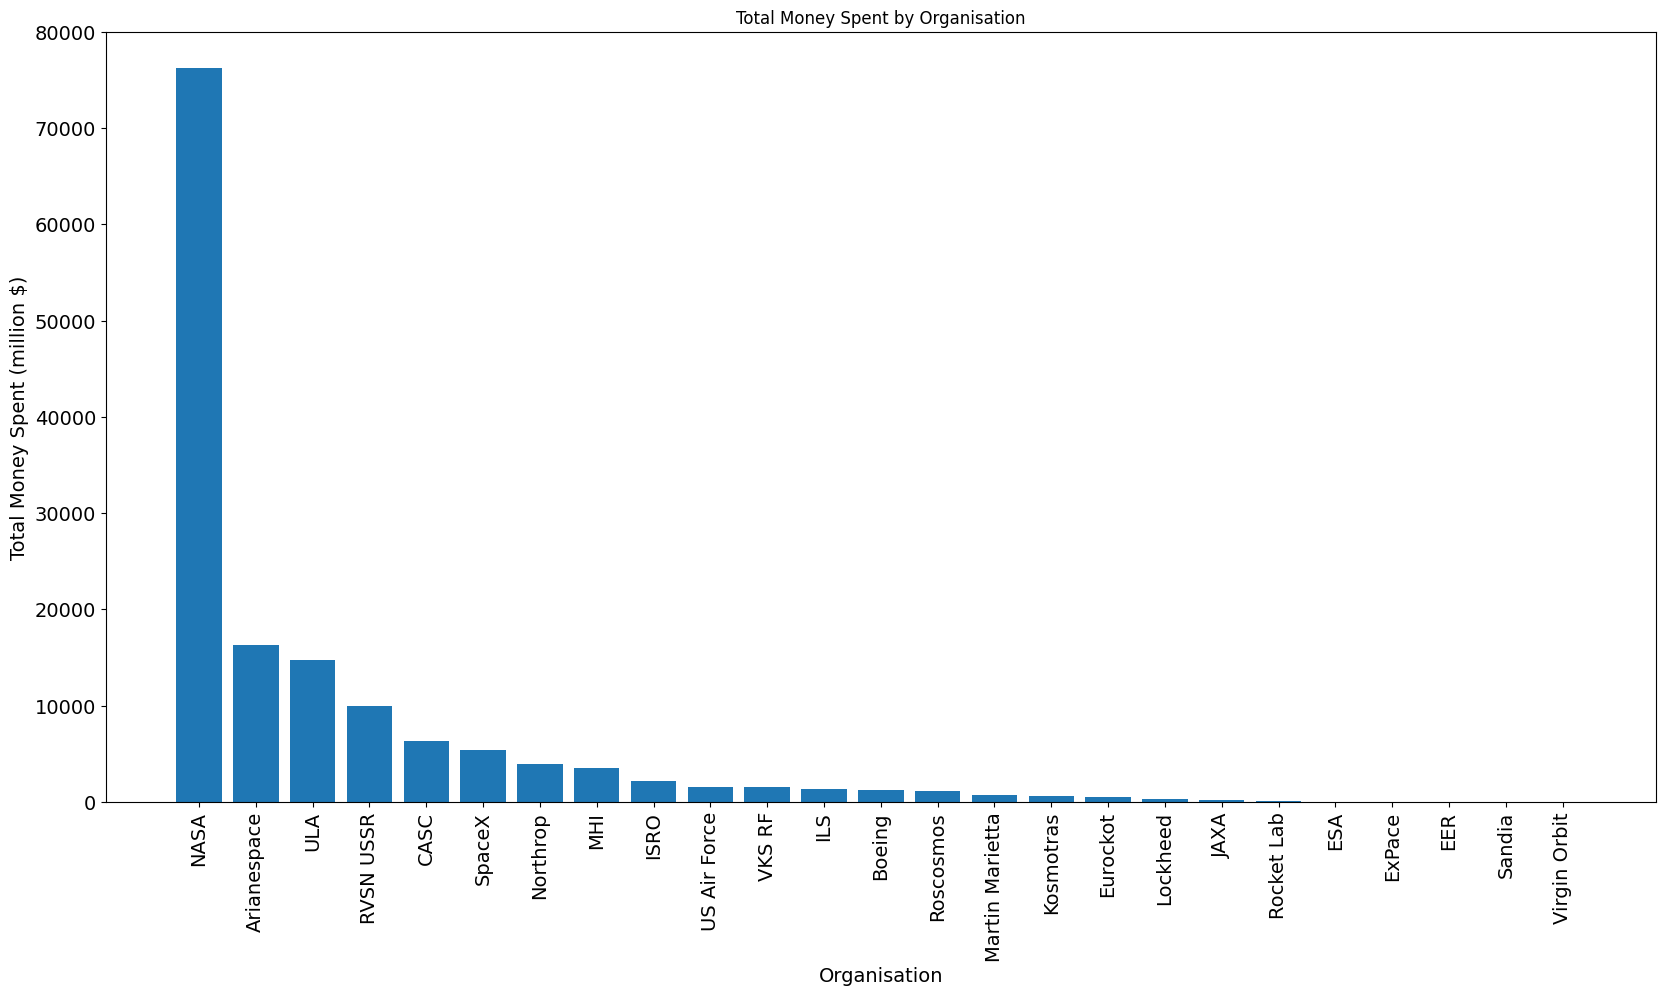

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Total Money Spent by Organisation")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Organisation", fontsize=14)
plt.ylabel("Total Money Spent (million $)", fontsize=14)
plt.ylim(0,80000)
plt.bar(df_organisation_spending.index, df_organisation_spending["Price","sum"])

Unsurprisingly, NASA has spent by far the most money.

This is in spite of the fact that USSR has many more launches. Quality over quantity!

# Money Spent by Organisation per Launch

In [ ]:
#Sort by sum
df_organisation_spending = df_organisation_spending.sort_values(by=("Price","mean"), ascending = False)

<BarContainer object of 25 artists>

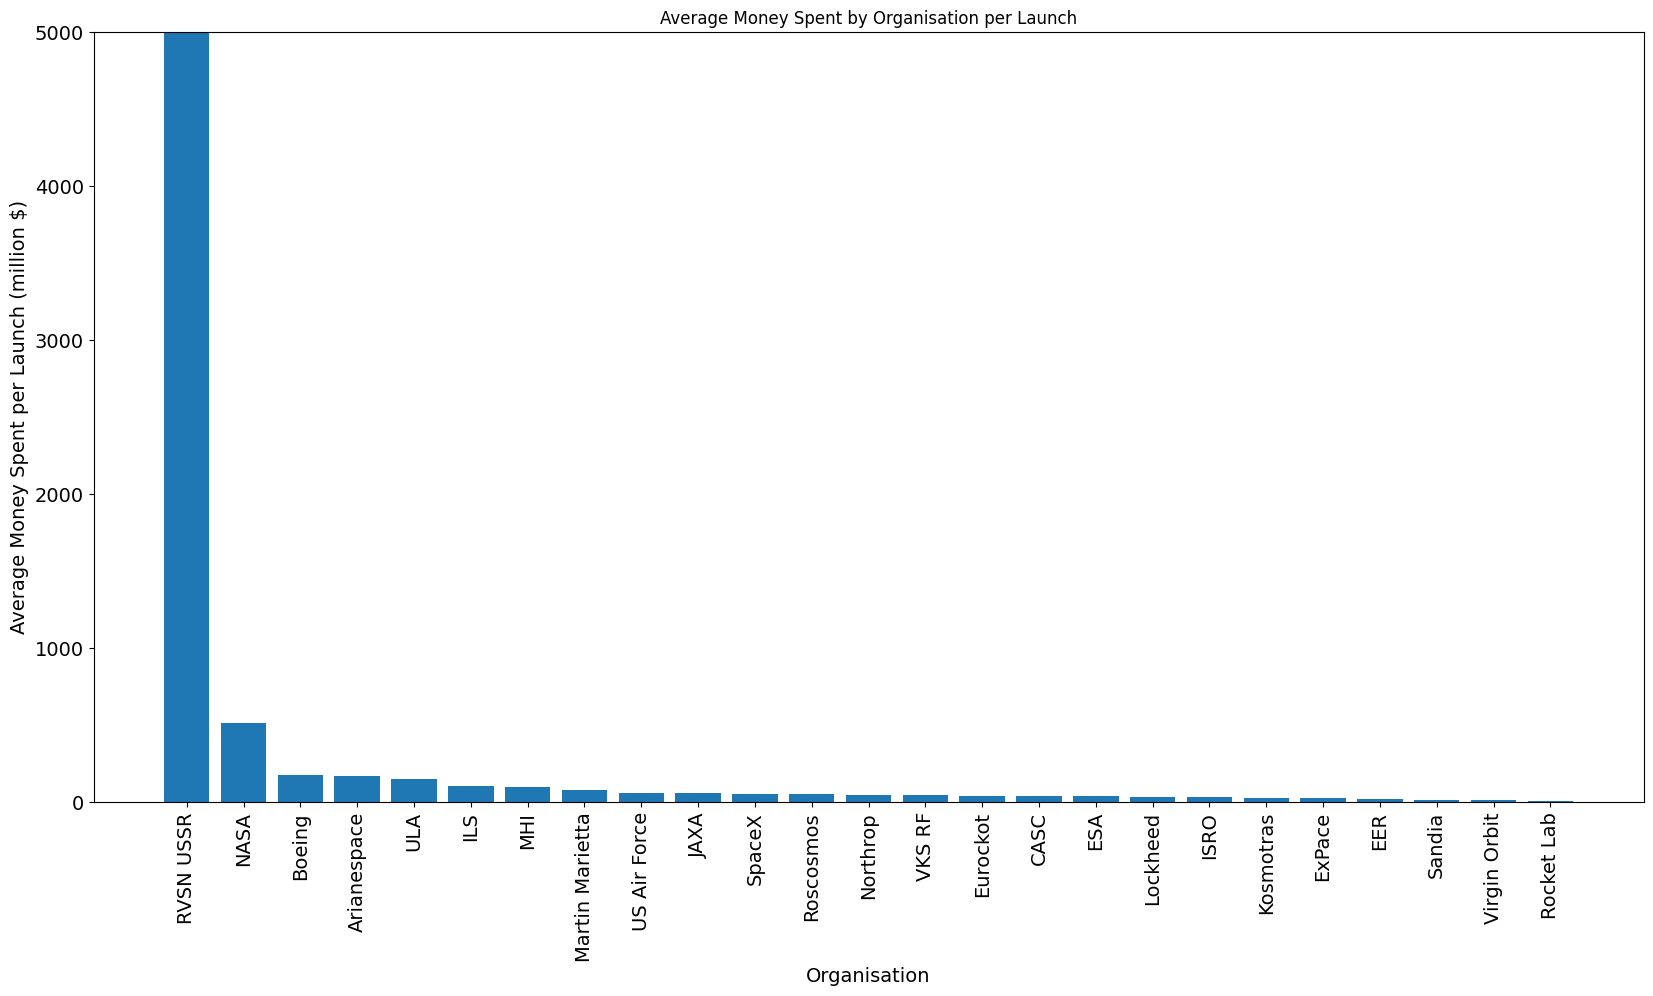

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Average Money Spent by Organisation per Launch")
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Organisation", fontsize=14)
plt.ylabel("Average Money Spent per Launch (million $)", fontsize=14)
plt.ylim(0,5000)
plt.bar(df_organisation_spending.index, df_organisation_spending["Price","mean"])

We see that USSR has by far the highest average cost per launch.

But wait, didn't the USSR also have the highest number of launches, tied with the USA?

This can't be right, the USSR was not know for having an efficient economy.

The reason the data looks like this is because there is no available data on the vast majority USSR launches (except for two launches each costing half a billion).

When the dropna() method was performed only these two expensive launches remained.

Therefore, USSR may as well not even be included in the chart above, and NASA should be considered as first place.

# Number of Launches per Year

In [ ]:
# Convert "date" column to datetime objects
# Use normalize() to keep the dtype as datetime64
# df_deduplicated["Date"] = pd.to_datetime(df_deduplicated['Date'], utc=True).dt.date
df_deduplicated["Date"] = pd.to_datetime(df_deduplicated['Date'], utc=True).dt.normalize()

In [ ]:
# Group by year
df_yearly_launches = df_deduplicated.groupby(df_deduplicated.Date.dt.year)["Date"].count()

In [ ]:
df_yearly_launches

Date
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

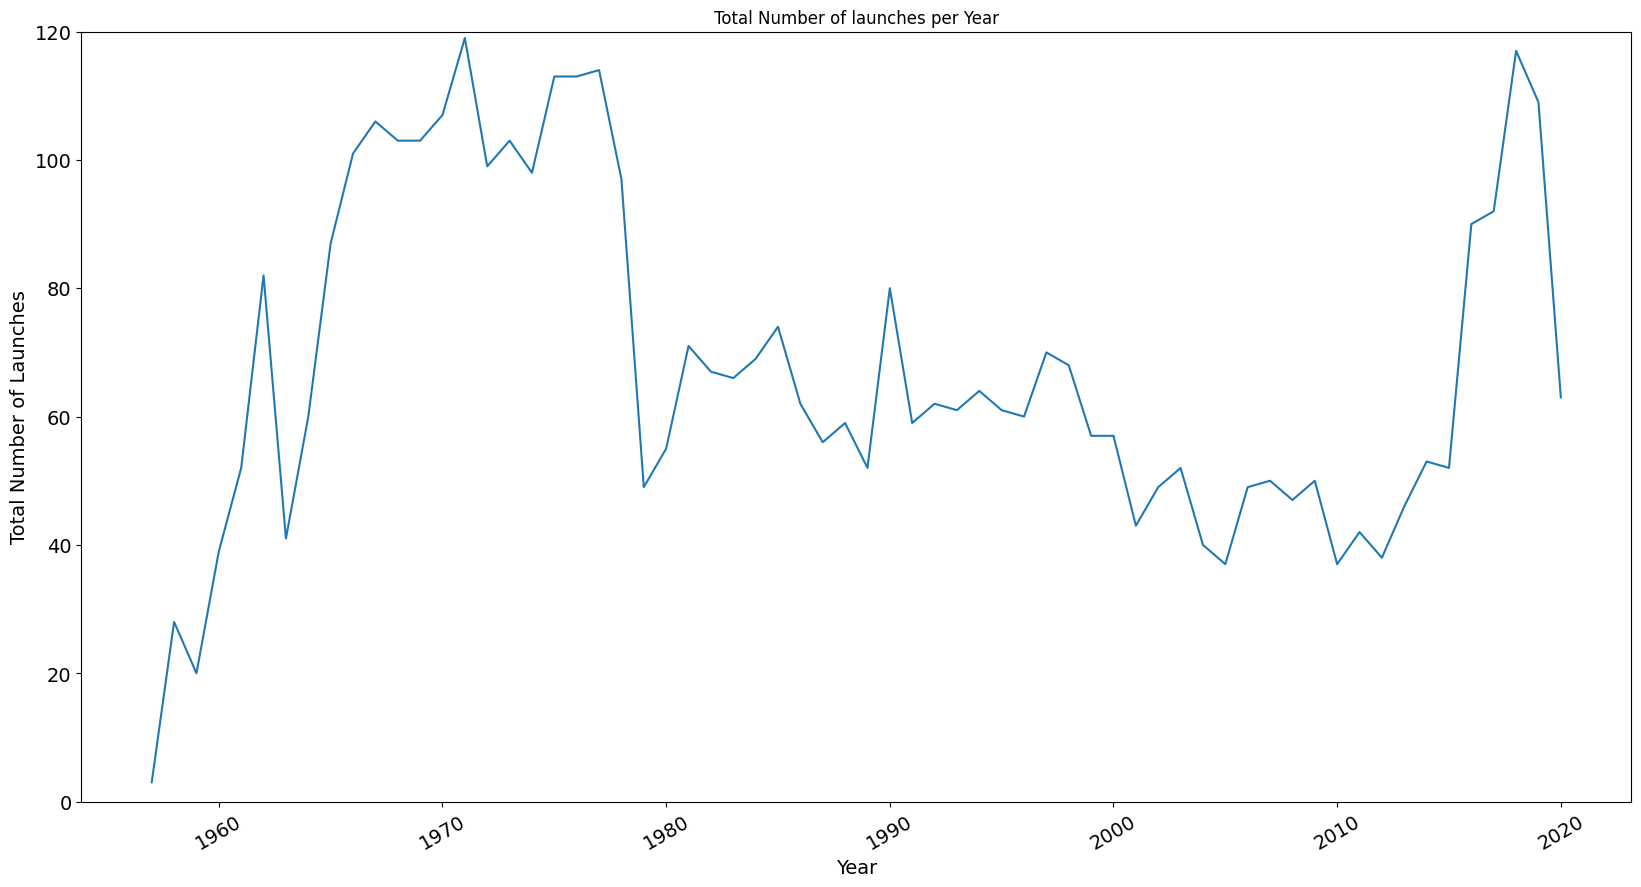

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Total Number of launches per Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Number of Launches", fontsize=14)
plt.ylim(0,120)
plt.plot(df_yearly_launches.index, df_yearly_launches.to_list())

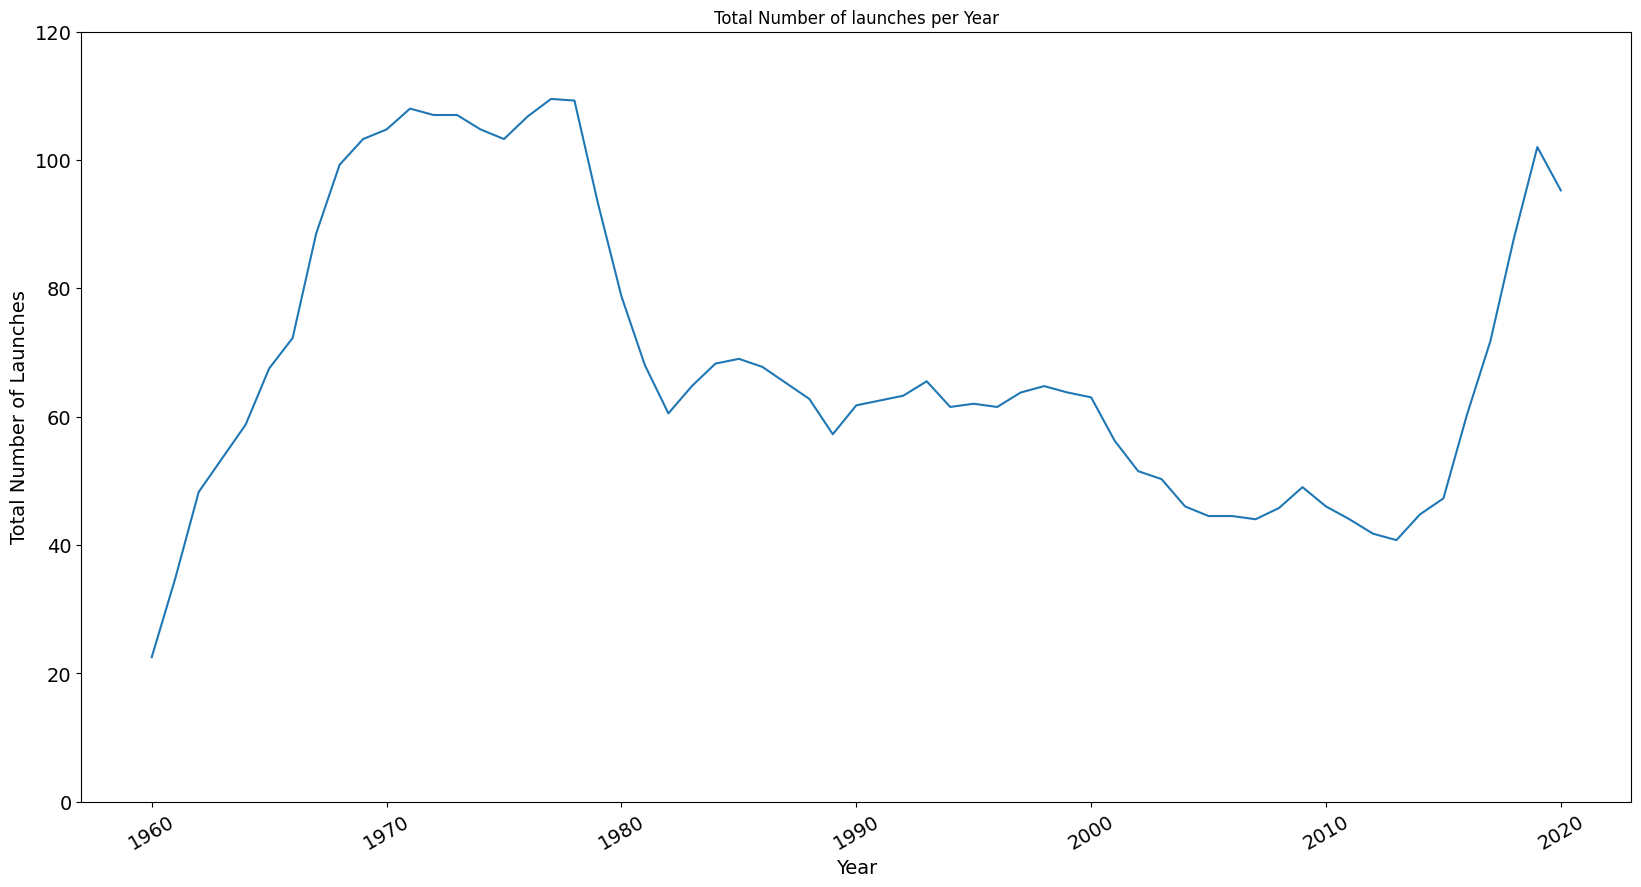

In [ ]:
#To smooth out time series data, create a rolling average
rolling_df = df_yearly_launches.rolling(window=4).mean()

#Plot the rolling data instead
plt.figure(figsize=(20,10))
plt.title("Total Number of launches per Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Number of Launches", fontsize=14)
plt.ylim(0,120)
plt.plot(rolling_df.index, rolling_df.to_list())

It can be see that there were many rocket launches during the space race.

Then things slowed down until they began picking up again in the 2010s.

It is likely that this trend would have continued, but then the Covid-19 caused the number of launches to start decreasing.

# Launches per Month

In [ ]:
# Group by month
df_monthly_launches = df_deduplicated.groupby(df_deduplicated.Date.dt.month)["Date"].count()

<BarContainer object of 12 artists>

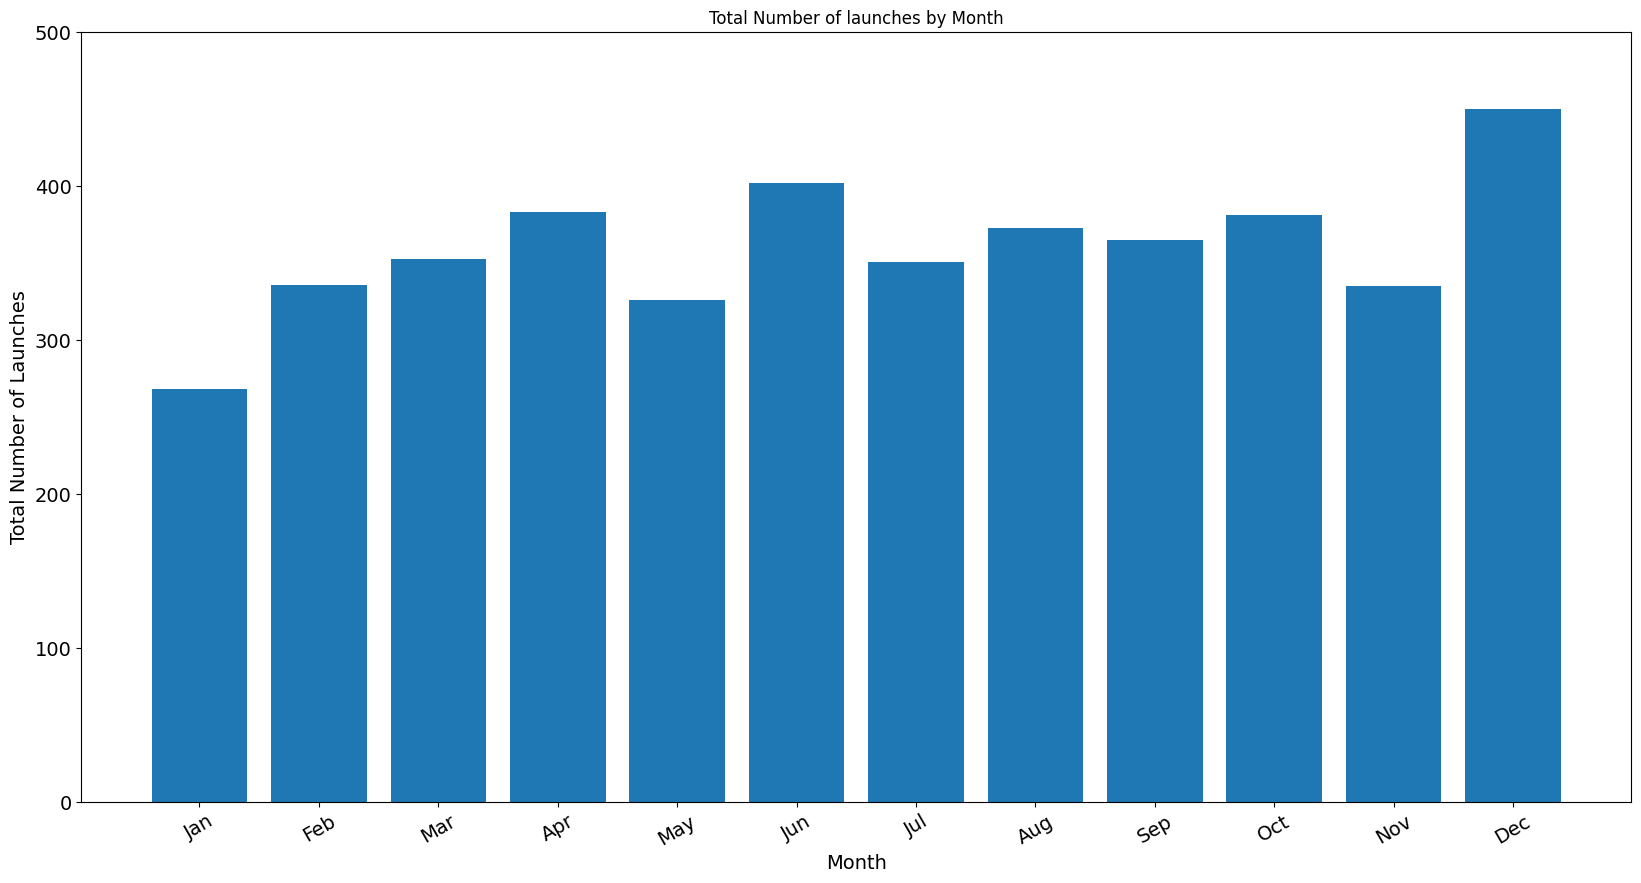

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Total Number of launches by Month")
plt.xticks(rotation=30, fontsize=14, ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.yticks(fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Number of Launches", fontsize=14)
plt.ylim(0,500)
plt.bar(df_monthly_launches.index, df_monthly_launches.to_list())

The most popular months for launches are June and December.

Perhaps this is because these months are when the solstices occur and the corresponding hemishpere will have the optimal weather conditions for launch.

# Average Launch Price varied Over Time

In [ ]:
# Since this analysis involves prices, drop all the NaN rows.
df_price_over_time = df_deduplicated.dropna()

In [ ]:
df_price_over_time = df_price_over_time.sort_values(by="Date")

In [ ]:
# Remove commmas from all entries in the "Price" column.
df_price_over_time.Price = df_price_over_time.Price.astype(str).str.replace(',', "")

In [ ]:
# Convert all entries in the "Price" column to floats
df_price_over_time.Price = pd.to_numeric(df_price_over_time.Price)

In [ ]:
mean_df_price_over_time = df_price_over_time.groupby([df_price_over_time.Date.dt.year])["Price"].mean()

<BarContainer object of 50 artists>

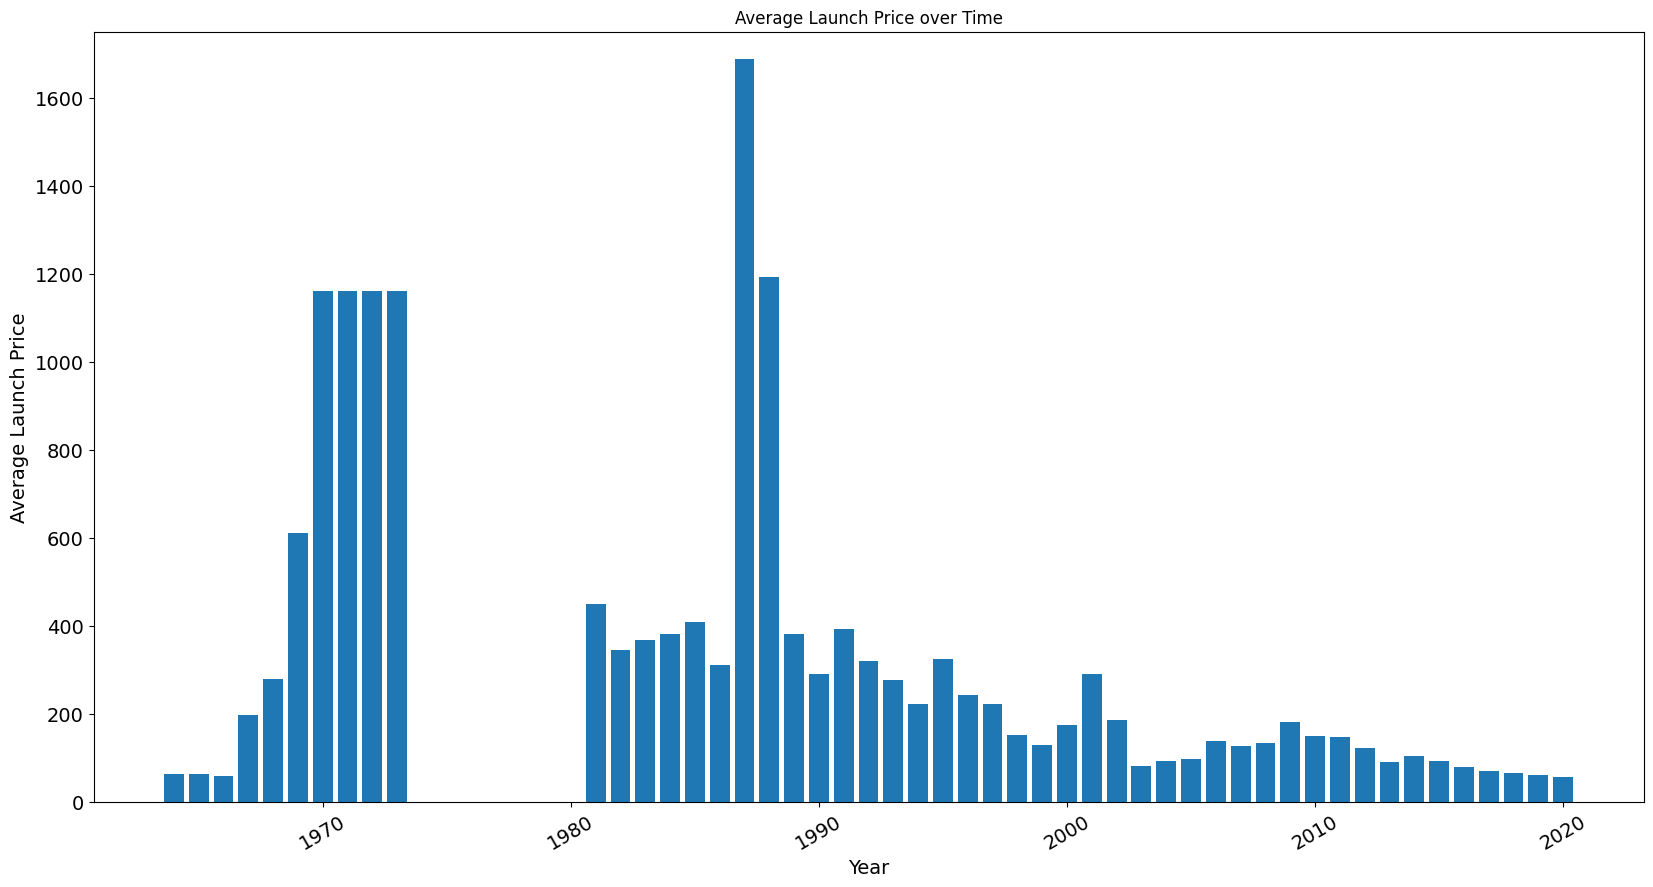

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Average Launch Price over Time")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Launch Price", fontsize=14)
plt.ylim(0,1750)
plt.bar(mean_df_price_over_time.index, mean_df_price_over_time.to_list())

It can be seen that launch prices gradually trend down over time.

This is to be expected as rocket technology improves over time and more cost effective techniques are developed. Also simple trial and error leads to better understanding.

The spike in the late 80s was caused by the two 5 billion USD USSR launches.

Launches were not free from 1974 to 1980... There is just no data.

# Number of Launches over Time by the Top 10 Organisations.

In [ ]:
# Find top 10 most commonly occuring organisations.
df_deduplicated["Organisation"].value_counts()[:10]

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

In [ ]:
# Remove the rows which are not from these organisations
df_top_10 = df_deduplicated[df_deduplicated["Organisation"].isin(["RVSN USSR", "Arianespace","General Dynamics","CASC","NASA","VKS RF","US Air Force","ULA","Boeing","Martin Marietta"])]

In [ ]:
# Group by year and subgroup by organisation
df_top_10 = df_top_10.groupby([df_top_10.Date.dt.year, "Organisation"])["Date"].count()

In [ ]:
# Convert from series to dataframe
df_top_10 = df_top_10.to_frame()

In [ ]:
# Rename column to "Launches"
df_top_10 = df_top_10.rename(columns={"Date":"Launches"})

In [ ]:
# Unstack so that data is columned by organisation and indexed by year.
df_top_10 = df_top_10.unstack()

In [ ]:
df_top_10

Launches                                                      \
Organisation Arianespace Boeing  CASC General Dynamics Martin Marietta  NASA   
Date                                                                           
1957                 NaN    NaN   NaN              NaN             NaN   NaN   
1958                 NaN    NaN   NaN              NaN             NaN  2.00   
1959                 NaN    NaN   NaN             1.00             NaN  1.00   
1960                 NaN    NaN   NaN             5.00             NaN  4.00   
1961                 NaN    NaN   NaN             8.00             NaN 12.00   
...                  ...    ...   ...              ...             ...   ...   
2016               11.00    NaN 22.00              NaN             NaN   NaN   
2017               11.00    NaN 16.00              NaN             NaN   NaN   
2018               11.00    NaN 37.00              NaN             NaN   NaN   
2019                9.00    NaN 27.00              NaN             NaN   NaN   
2020                4.00    NaN 19.00              NaN             NaN   NaN   

                                                  
Organisation RVSN USSR   ULA US Air Force VKS RF  
Date                                              
1957              2.00   NaN          NaN    NaN  
1958              5.00   NaN         2.00    NaN  
1959              4.00   NaN        10.00    NaN  
1960              9.00   NaN        21.00    NaN  
1961              9.00   NaN        23.00    NaN  
...                ...   ...          ...    ...  
2016               NaN 12.00          NaN   4.00  
2017               NaN  8.00          NaN   6.00  
2018               NaN  8.00          NaN   5.00  
2019               NaN  5.00          NaN   8.00  
2020               NaN  4.00          NaN   3.00  

[64 rows x 10 columns]

In [ ]:
# Set all NaN values to zero
df_top_10 = df_top_10.fillna(0)

In [ ]:
df_top_10

Launches                                                      \
Organisation Arianespace Boeing  CASC General Dynamics Martin Marietta  NASA   
Date                                                                           
1957                0.00   0.00  0.00             0.00            0.00  0.00   
1958                0.00   0.00  0.00             0.00            0.00  2.00   
1959                0.00   0.00  0.00             1.00            0.00  1.00   
1960                0.00   0.00  0.00             5.00            0.00  4.00   
1961                0.00   0.00  0.00             8.00            0.00 12.00   
...                  ...    ...   ...              ...             ...   ...   
2016               11.00   0.00 22.00             0.00            0.00  0.00   
2017               11.00   0.00 16.00             0.00            0.00  0.00   
2018               11.00   0.00 37.00             0.00            0.00  0.00   
2019                9.00   0.00 27.00             0.00            0.00  0.00   
2020                4.00   0.00 19.00             0.00            0.00  0.00   

                                                  
Organisation RVSN USSR   ULA US Air Force VKS RF  
Date                                              
1957              2.00  0.00         0.00   0.00  
1958              5.00  0.00         2.00   0.00  
1959              4.00  0.00        10.00   0.00  
1960              9.00  0.00        21.00   0.00  
1961              9.00  0.00        23.00   0.00  
...                ...   ...          ...    ...  
2016              0.00 12.00         0.00   4.00  
2017              0.00  8.00         0.00   6.00  
2018              0.00  8.00         0.00   5.00  
2019              0.00  5.00         0.00   8.00  
2020              0.00  4.00         0.00   3.00  

[64 rows x 10 columns]

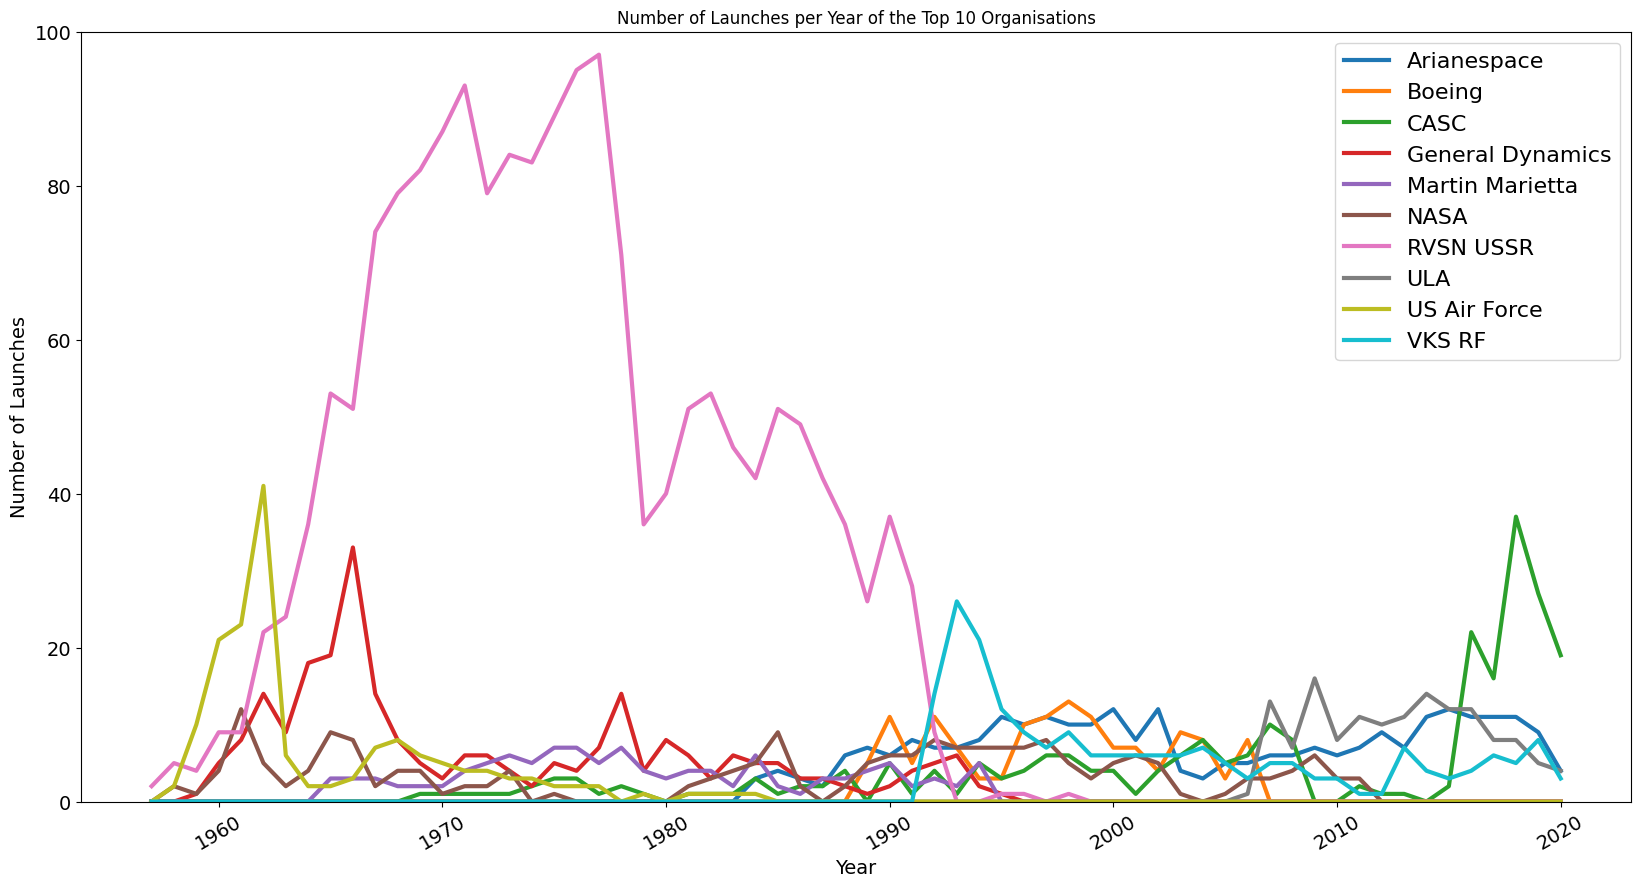

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Number of Launches per Year of the Top 10 Organisations")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.ylim(0,100)

for column in df_top_10["Launches"].columns:
  plt.plot(df_top_10.index, df_top_10['Launches'][column],
           linewidth=3, label=df_top_10['Launches'][column].name)

plt.legend(fontsize=16)

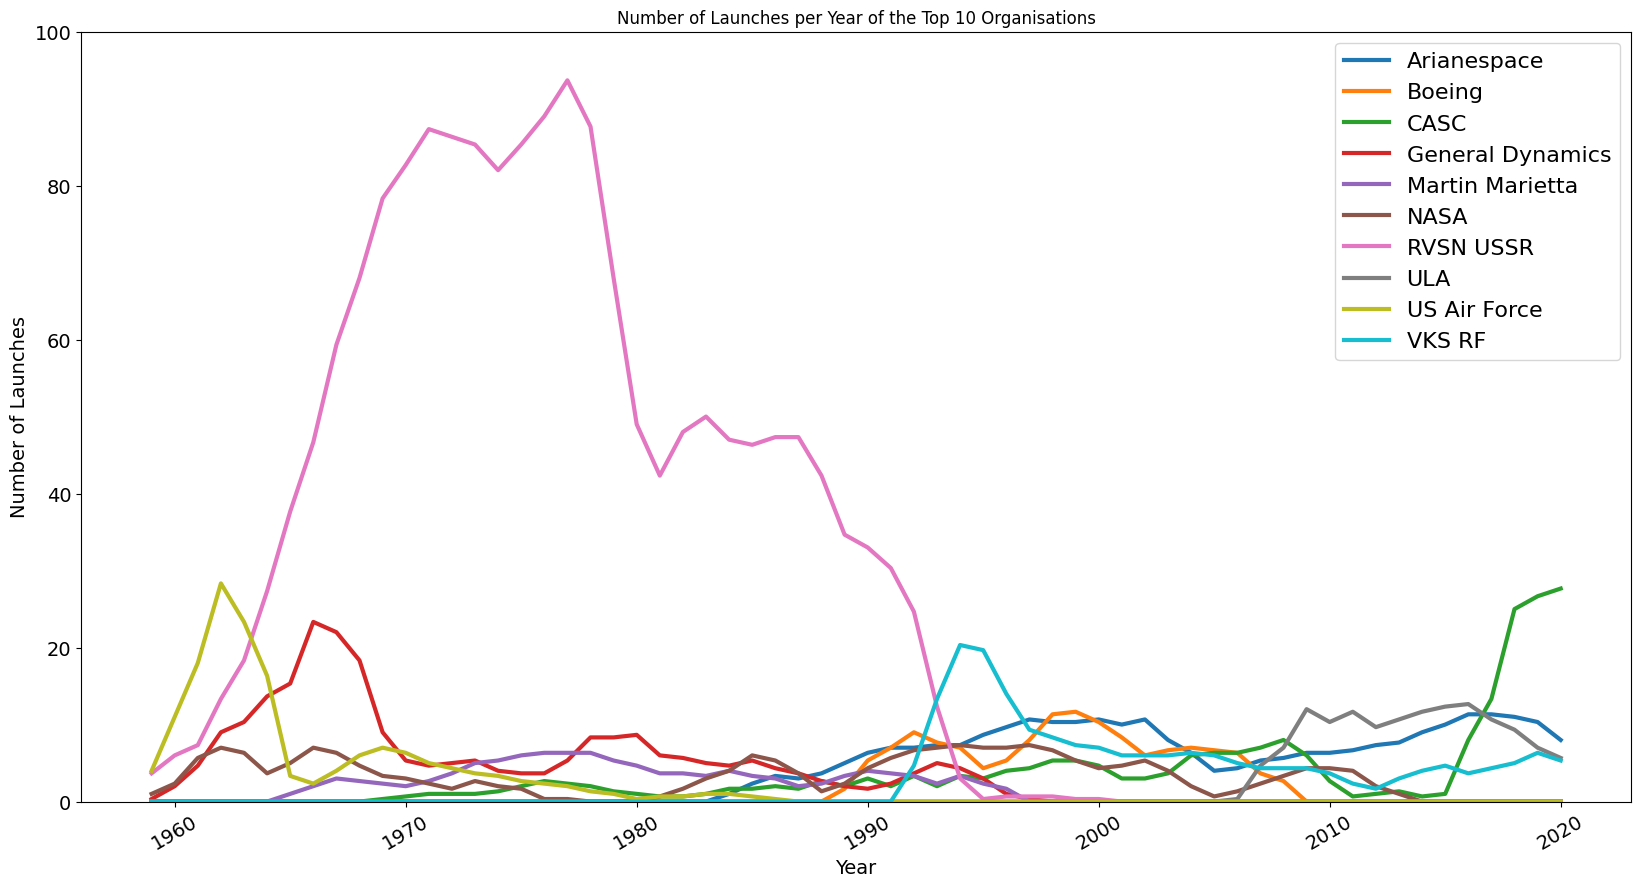

In [ ]:
rolled_df = df_top_10.rolling(window=3).mean()

plt.figure(figsize=(20,10))
plt.title("Number of Launches per Year of the Top 10 Organisations")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.ylim(0,100)

for column in rolled_df["Launches"].columns:
  plt.plot(rolled_df.index, rolled_df['Launches'][column],
           linewidth=3, label=rolled_df['Launches'][column].name)

plt.legend(fontsize=16)

During the space race, the main players were the USSR, the US Air Force, General dynamics, Martin Marietta and NASA.

At the end of the cold war at around 1991, these companies all stopped launches except for NASA who persisted until 2014.

At around the end of the cold war, VKS RF and Boeing emerged.

In the present day, the main players are VKS RF, ULA, Arianespace, and CASC. With CASC being the dominant company.

# Total number of launches of the USSR and the USA

In [ ]:
# The cold war lasted from the start of the dataset up until 1991.
df_cold_war = df_deduplicated[df_deduplicated.Date.dt.year <= 1991]

In [ ]:
#Kazakhstan is a former Soviet Republic so should be counted as part of Russis during the cold war.
df_cold_war = df_cold_war.replace({"KAZ":"RUS"})

In [ ]:
# Remove all countries other than USA and Russia.
df_cold_war = df_cold_war[df_cold_war["Country"].isin(["USA", "RUS"])]

In [ ]:
# Group by year and subgroup by country
df_cold_war_timeline = df_cold_war.groupby([df_cold_war.Date.dt.year, "Country"])["Date"].count()

In [ ]:
# Convert from series to dataframe
df_cold_war_timeline = df_cold_war_timeline.to_frame()

In [ ]:
# Rename column to "Launches"
df_cold_war_timeline = df_cold_war_timeline.rename(columns={"Date":"Launches"})

In [ ]:
# Unstack so that data is columned by country and indexed by year.
df_cold_war_timeline = df_cold_war_timeline.unstack()

In [ ]:
df_pie = df_cold_war_timeline.Launches.sum()

([<matplotlib.patches.Wedge at 0x790886d5d9f0>,
 [Text(-0.7217126585979522, 0.8301390476417042, 'RUS'),
  Text(0.7217127363211763, -0.8301389800700847, 'USA')])

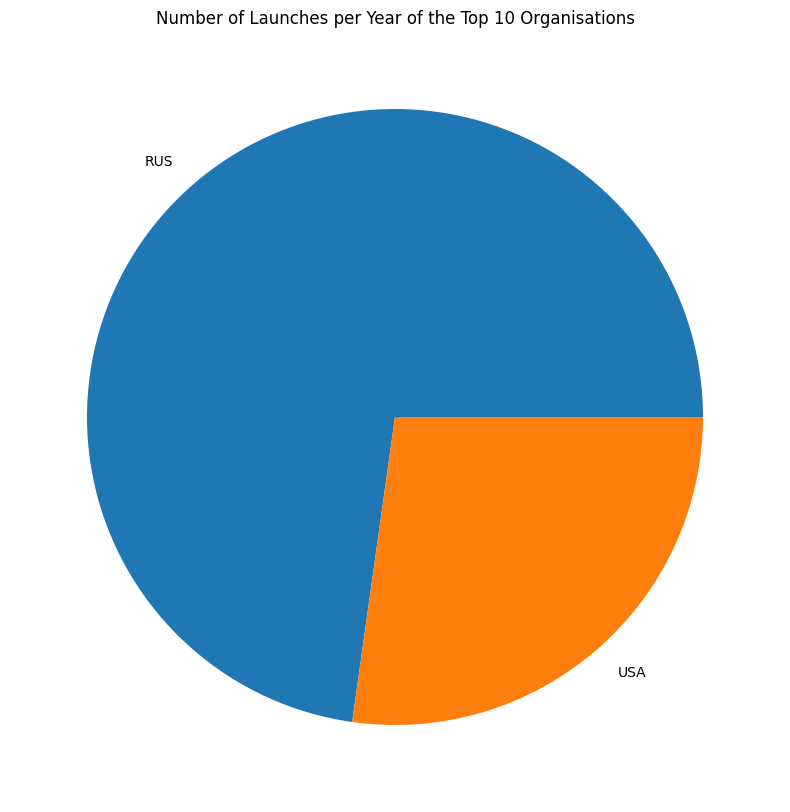

In [ ]:
#df_pie.plot(kind='pie')

plt.figure(figsize=(20,10))
plt.title("Number of Launches per Year of the Top 10 Organisations")
plt.pie(df_pie, labels=df_pie.index)

# Total Number of Launches Year-On-Year by the Two Superpowers

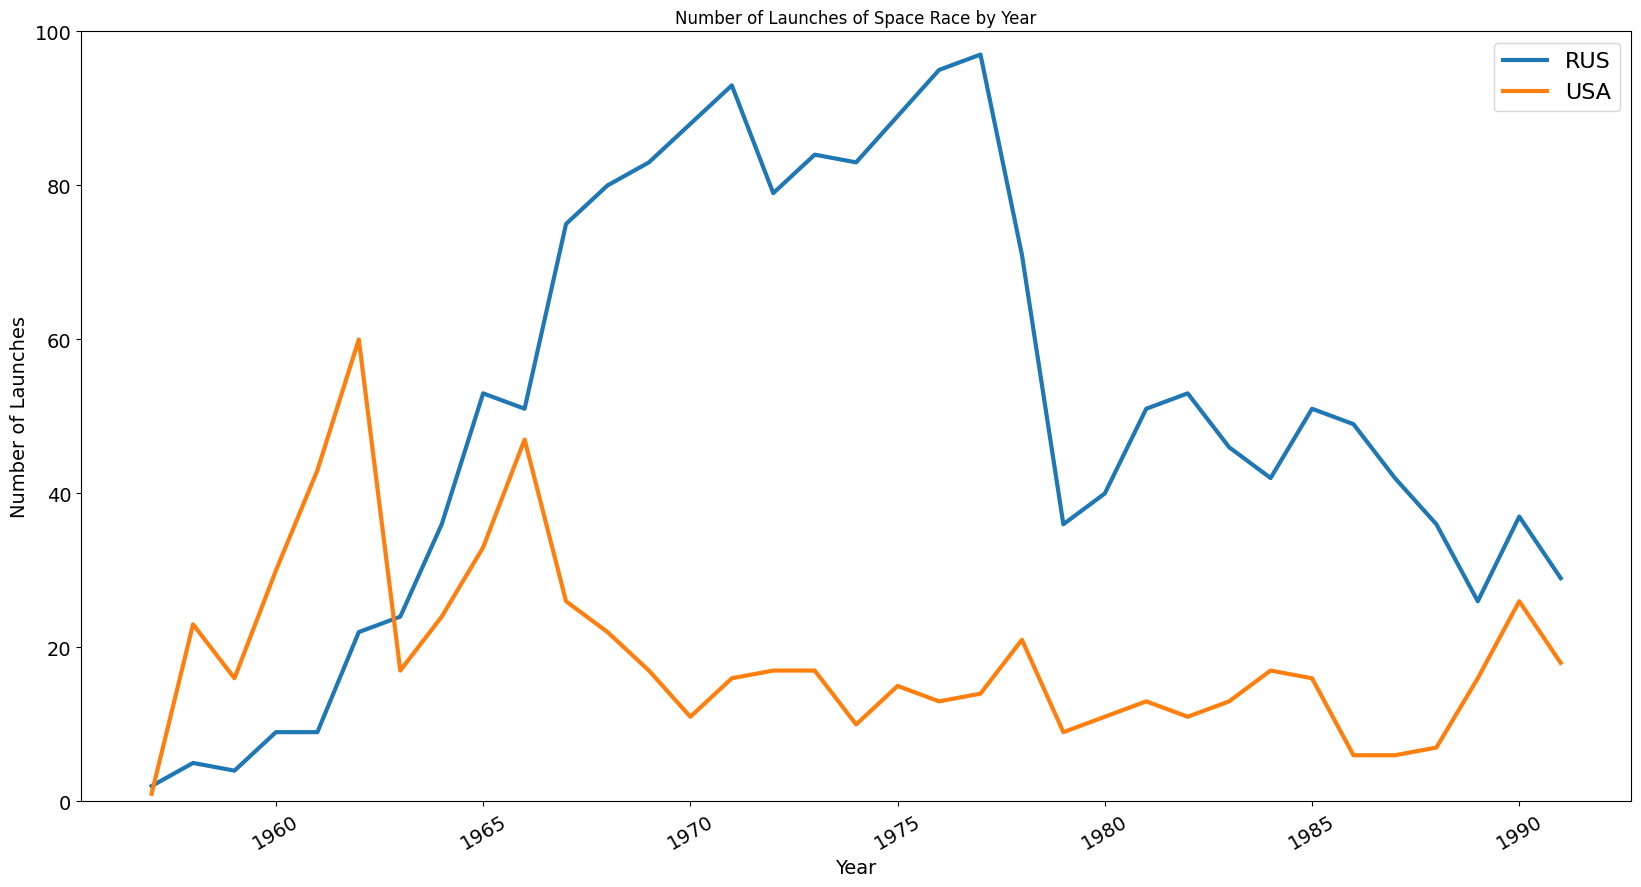

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Number of Launches of Space Race by Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.ylim(0,100)

for column in df_cold_war_timeline["Launches"].columns:
  plt.plot(df_cold_war_timeline.index, df_cold_war_timeline['Launches'][column],
           linewidth=3, label=df_cold_war_timeline['Launches'][column].name)

plt.legend(fontsize=16)

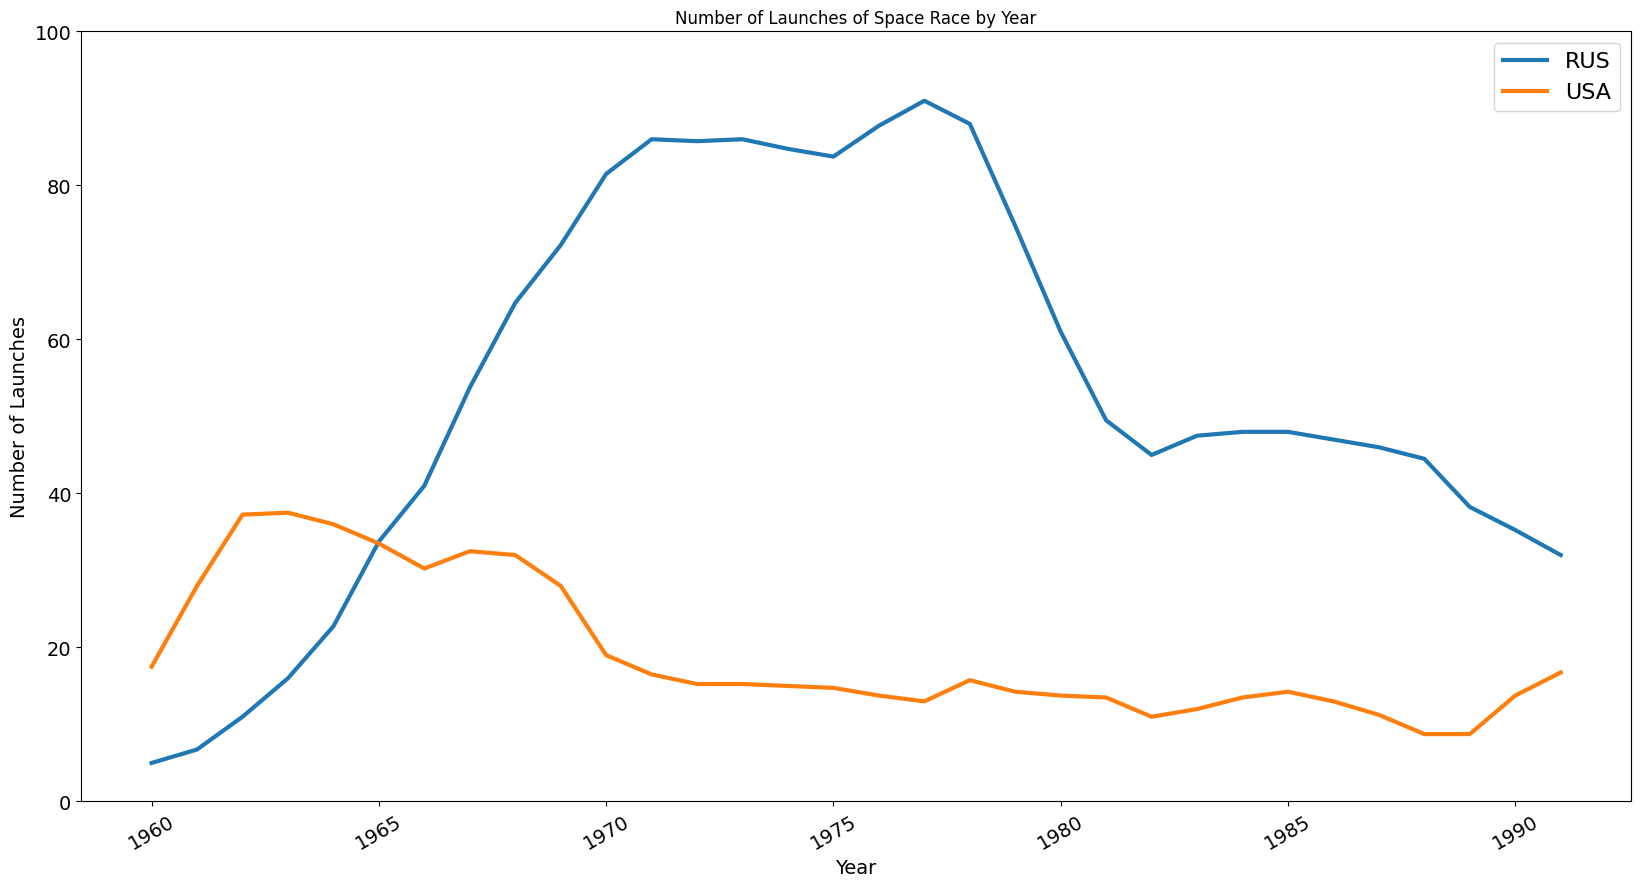

In [ ]:
rolled_df = df_cold_war_timeline.rolling(window=4).mean()

plt.figure(figsize=(20,10))
plt.title("Number of Launches of Space Race by Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.ylim(0,100)

for column in rolled_df["Launches"].columns:
  plt.plot(rolled_df.index, rolled_df['Launches'][column],
           linewidth=3, label=rolled_df['Launches'][column].name)

plt.legend(fontsize=16)

# Total Number of Mission Failures Year on Year.

In [ ]:
df_cold_war_mission_status = df_cold_war.groupby([df_cold_war.Date.dt.year, "Country", "Mission_Status"])["Date"].count()

In [ ]:
df_cold_war_mission_status = df_cold_war_mission_status.to_frame()

In [ ]:
df_cold_war_mission_status = df_cold_war_mission_status.rename(columns={"Date":"Count"})

In [ ]:
df_cold_war_mission_status = df_cold_war_mission_status.unstack()

In [ ]:
df_cold_war_mission_status = df_cold_war_mission_status.fillna(0)

In [ ]:
df_cold_war_mission_status

Count                                          
Mission_Status Failure Partial Failure Prelaunch Failure Success
Date Country                                                    
1957 RUS          0.00            0.00              0.00    2.00
     USA          1.00            0.00              0.00    0.00
1958 RUS          4.00            0.00              0.00    1.00
     USA         16.00            2.00              0.00    5.00
1959 RUS          1.00            1.00              0.00    2.00
...                ...             ...               ...     ...
1989 USA          0.00            0.00              0.00   16.00
1990 RUS          1.00            1.00              0.00   35.00
     USA          1.00            0.00              0.00   25.00
1991 RUS          2.00            0.00              0.00   27.00
     USA          1.00            1.00              0.00   16.00

[70 rows x 4 columns]

In [ ]:
df_cold_war_mission_status = df_cold_war_mission_status.unstack()

In [ ]:
df_cold_war_mission_status

Count                                                    \
Mission_Status Failure       Partial Failure      Prelaunch Failure        
Country            RUS   USA             RUS  USA               RUS  USA   
Date                                                                       
1957              0.00  1.00            0.00 0.00              0.00 0.00   
1958              4.00 16.00            0.00 2.00              0.00 0.00   
1959              1.00  8.00            1.00 2.00              0.00 0.00   
1960              6.00 14.00            0.00 0.00              0.00 0.00   
1961              4.00 13.00            0.00 3.00              0.00 0.00   
1962              7.00  8.00            0.00 2.00              0.00 0.00   
1963              8.00  4.00            0.00 0.00              0.00 0.00   
1964              6.00  4.00            1.00 1.00              0.00 0.00   
1965              5.00  6.00            1.00 1.00              0.00 0.00   
1966              6.00  2.00            4.00 5.00              1.00 0.00   
1967              8.00  2.00            4.00 3.00              0.00 0.00   
1968              5.00  1.00            3.00 2.00              0.00 0.00   
1969             14.00  0.00            1.00 0.00              0.00 0.00   
1970              6.00  1.00            3.00 1.00              0.00 0.00   
1971              8.00  2.00            2.00 0.00              0.00 0.00   
1972              5.00  2.00            3.00 0.00              0.00 0.00   
1973              4.00  1.00            0.00 0.00              0.00 0.00   
1974              4.00  1.00            1.00 0.00              0.00 0.00   
1975              3.00  3.00            0.00 0.00              0.00 0.00   
1976              1.00  0.00            2.00 0.00              0.00 0.00   
1977              3.00  1.00            0.00 0.00              0.00 0.00   
1978              0.00  1.00            2.00 0.00              0.00 0.00   
1979              0.00  0.00            0.00 0.00              0.00 0.00   
1980              0.00  2.00            3.00 0.00              0.00 0.00   
1981              1.00  1.00            2.00 1.00              0.00 0.00   
1982              2.00  0.00            2.00 0.00              0.00 0.00   
1983              1.00  0.00            0.00 0.00              0.00 0.00   
1984              0.00  1.00            1.00 0.00              0.00 0.00   
1985              3.00  1.00            1.00 0.00              0.00 0.00   
1986              1.00  2.00            2.00 0.00              0.00 0.00   
1987              0.00  1.00            1.00 0.00              0.00 0.00   
1988              0.00  0.00            0.00 1.00              0.00 0.00   
1989              1.00  0.00            0.00 0.00              0.00 0.00   
1990              1.00  1.00            1.00 0.00              0.00 0.00   
1991              2.00  1.00            0.00 1.00              0.00 0.00   

                              
Mission_Status Success        
Country            RUS   USA  
Date                          
1957              2.00  0.00  
1958              1.00  5.00  
1959              2.00  6.00  
1960              3.00 16.00  
1961              5.00 27.00  
1962             15.00 50.00  
1963             16.00 13.00  
1964             29.00 19.00  
1965             47.00 26.00  
1966             40.00 40.00  
1967             63.00 21.00  
1968             72.00 19.00  
1969             68.00 17.00  
1970             79.00  9.00  
1971             83.00 14.00  
1972             71.00 15.00  
1973             80.00 16.00  
1974             78.00  9.00  
1975             86.00 12.00  
1976             92.00 13.00  
1977             94.00 13.00  
1978             69.00 20.00  
1979             36.00  9.00  
1980             37.00  9.00  
1981             48.00 11.00  
1982             49.00 11.00  
1983             45.00 13.00  
1984             41.00 16.00  
1985             47.00 15.00  
1986             46.00  4.00 

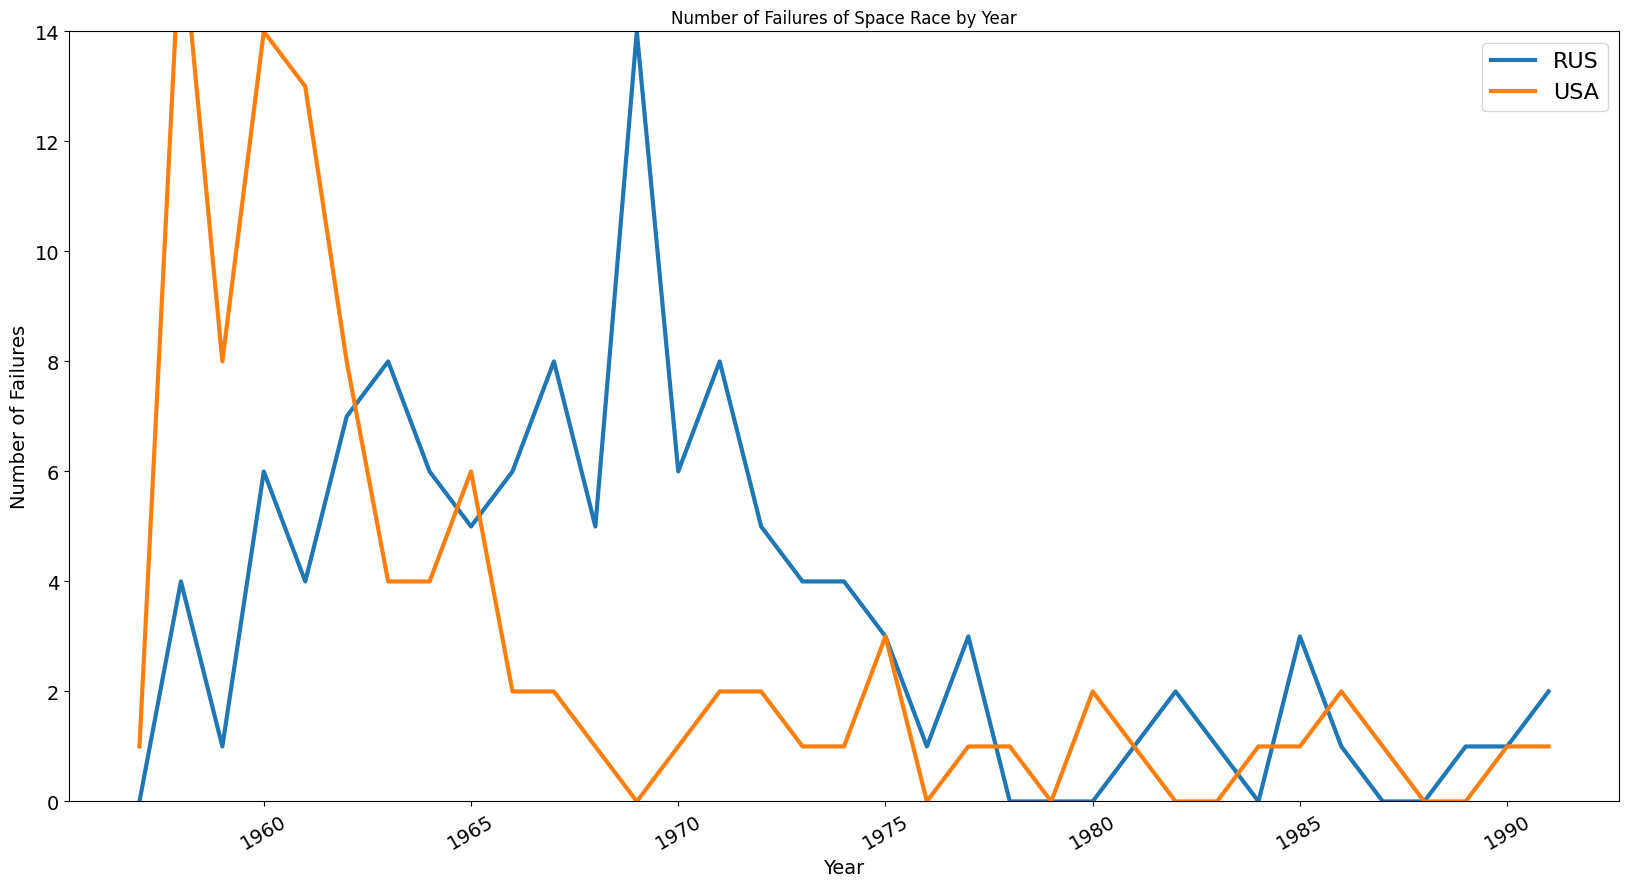

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Number of Failures of Space Race by Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Failures", fontsize=14)
plt.ylim(0,14)

for column in df_cold_war_mission_status["Count"]["Failure"].columns:
  plt.plot(df_cold_war_mission_status.index, df_cold_war_mission_status['Count']["Failure"][column],
           linewidth=3, label=df_cold_war_mission_status['Count']["Failure"][column].name)

plt.legend(fontsize=16)

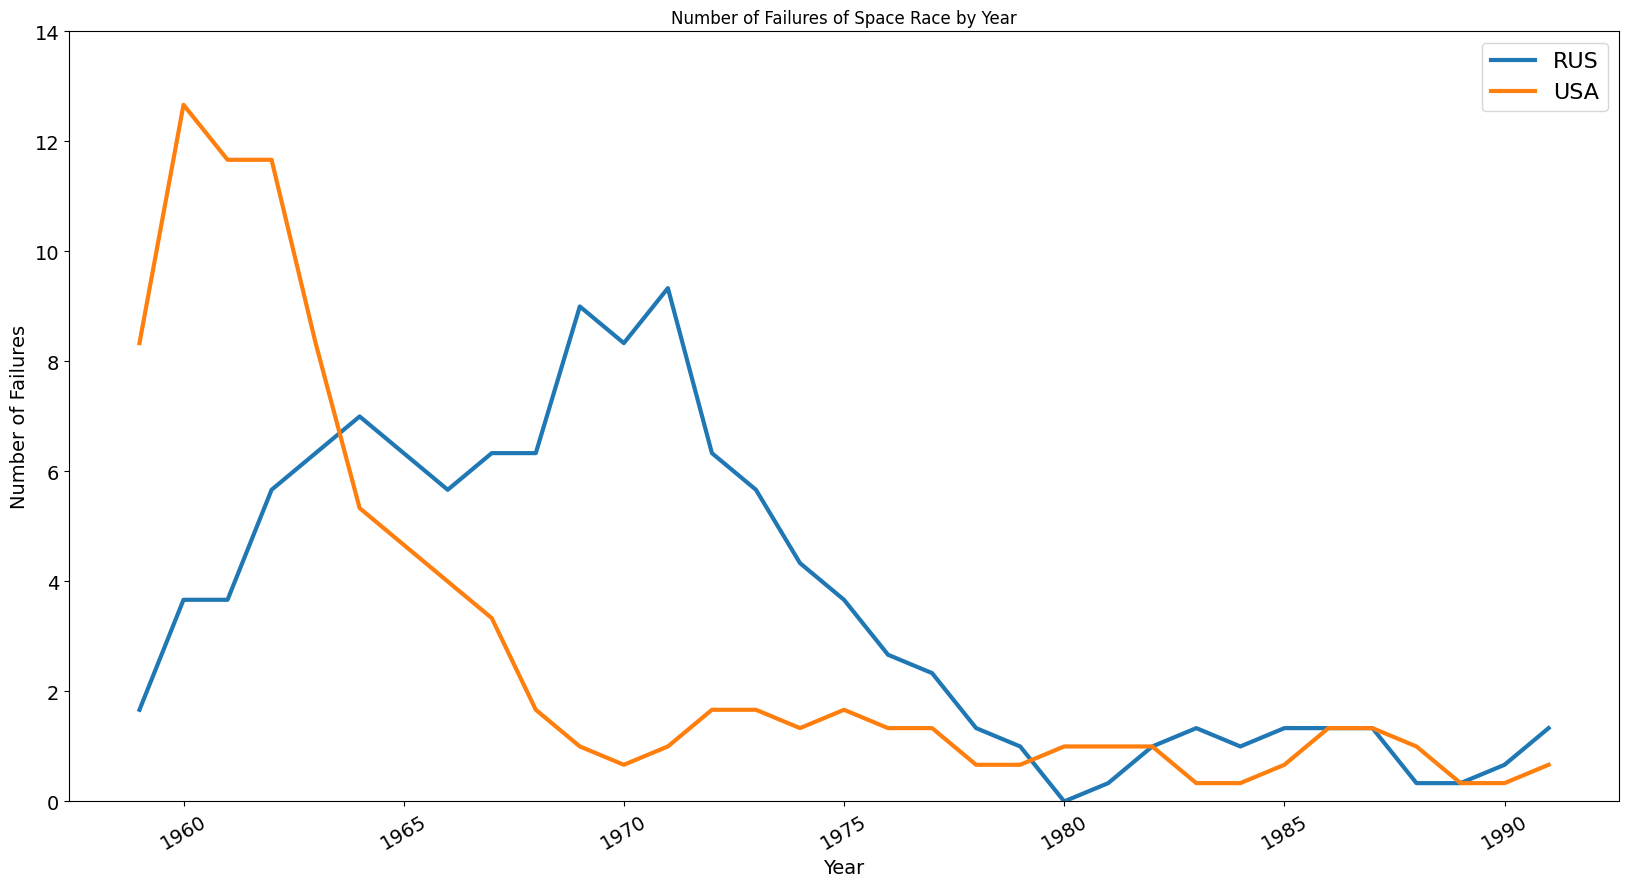

In [ ]:
rolled_df = df_cold_war_mission_status.rolling(window=3).mean()

plt.figure(figsize=(20,10))
plt.title("Number of Failures of Space Race by Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Failures", fontsize=14)
plt.ylim(0,14)

for column in rolled_df["Count"]["Failure"].columns:
  plt.plot(rolled_df.index, rolled_df['Count']["Failure"][column],
           linewidth=3, label=rolled_df['Count']["Failure"][column].name)

plt.legend(fontsize=16)


At the beginning, it may have appeared that the USSR was going to win the space race.

However, by 1970, the US had mostly perfected their craft while the USSR didnt until 1980.

It may appear that the USSR suddenly got worse at building rockets in 1970, but this is just a projuct of the fact that they launched an absurd number of rockets around this time, so the absolute number of failures increased.

# Percentage of Failures over Time

In [ ]:
# To work out the failure rate, add the 3 columns "","","", and then divide by the total column
failures_column = df_cold_war_mission_status.Count["Failure"] + df_cold_war_mission_status.Count["Partial Failure"] + df_cold_war_mission_status.Count["Prelaunch Failure"]
total_column = df_cold_war_mission_status.Count["Failure"] + df_cold_war_mission_status.Count["Partial Failure"] + df_cold_war_mission_status.Count["Prelaunch Failure"] + df_cold_war_mission_status.Count["Success"]
df_failure_rate = failures_column / total_column

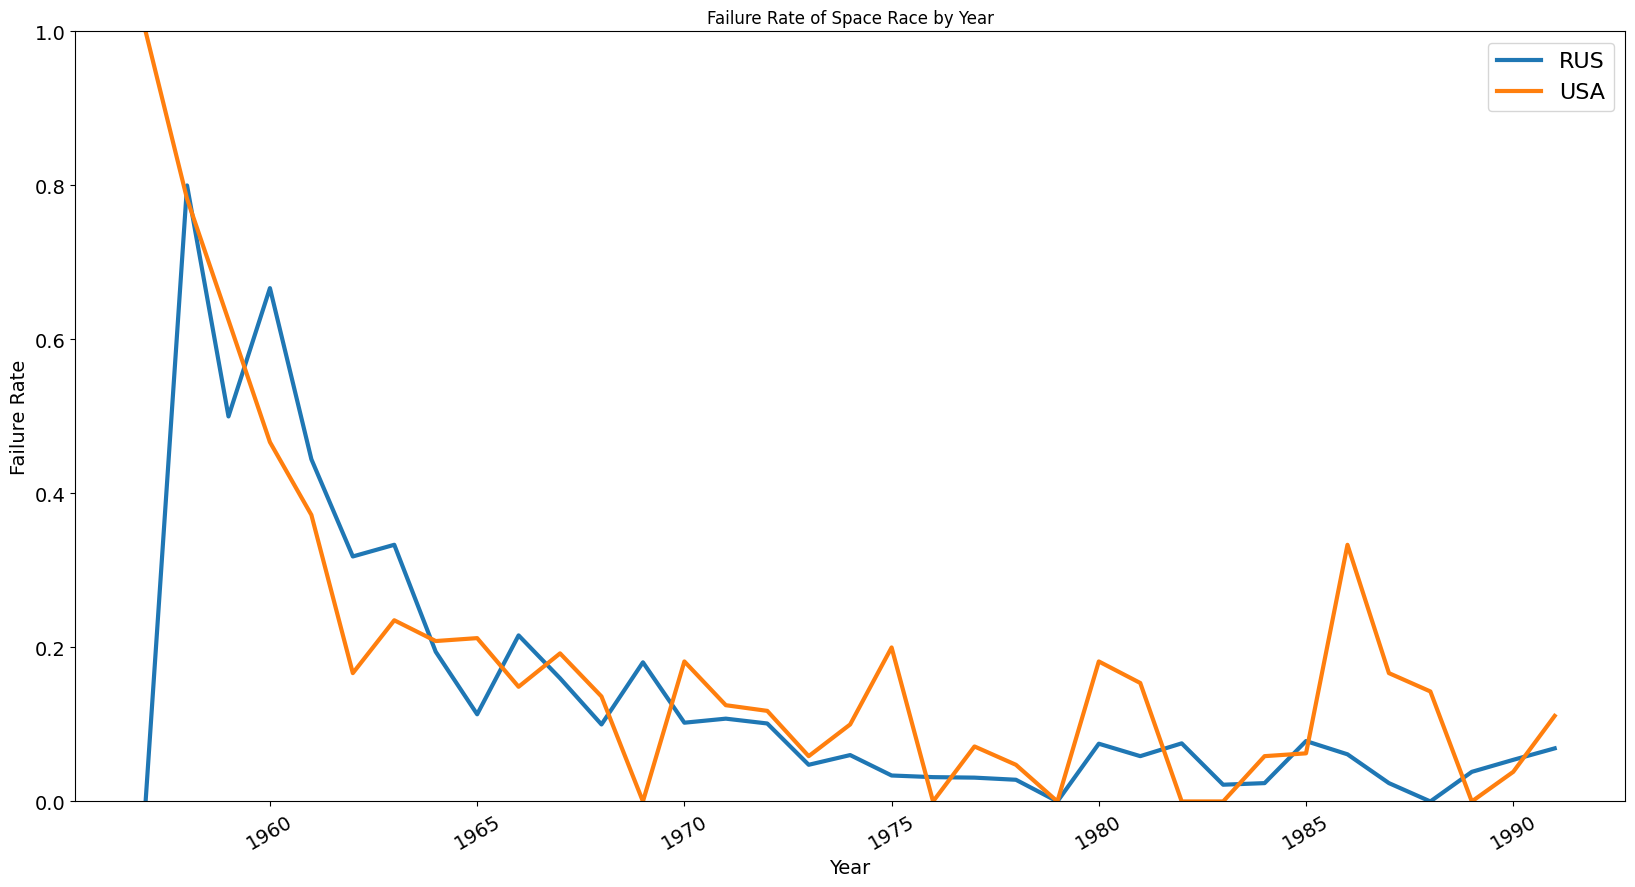

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Failure Rate of Space Race by Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Failure Rate", fontsize=14)
plt.ylim(0,1)

for column in df_failure_rate.columns:
  plt.plot(df_failure_rate.index, df_failure_rate[column],
           linewidth=3, label=df_failure_rate[column].name)

plt.legend(fontsize=16)

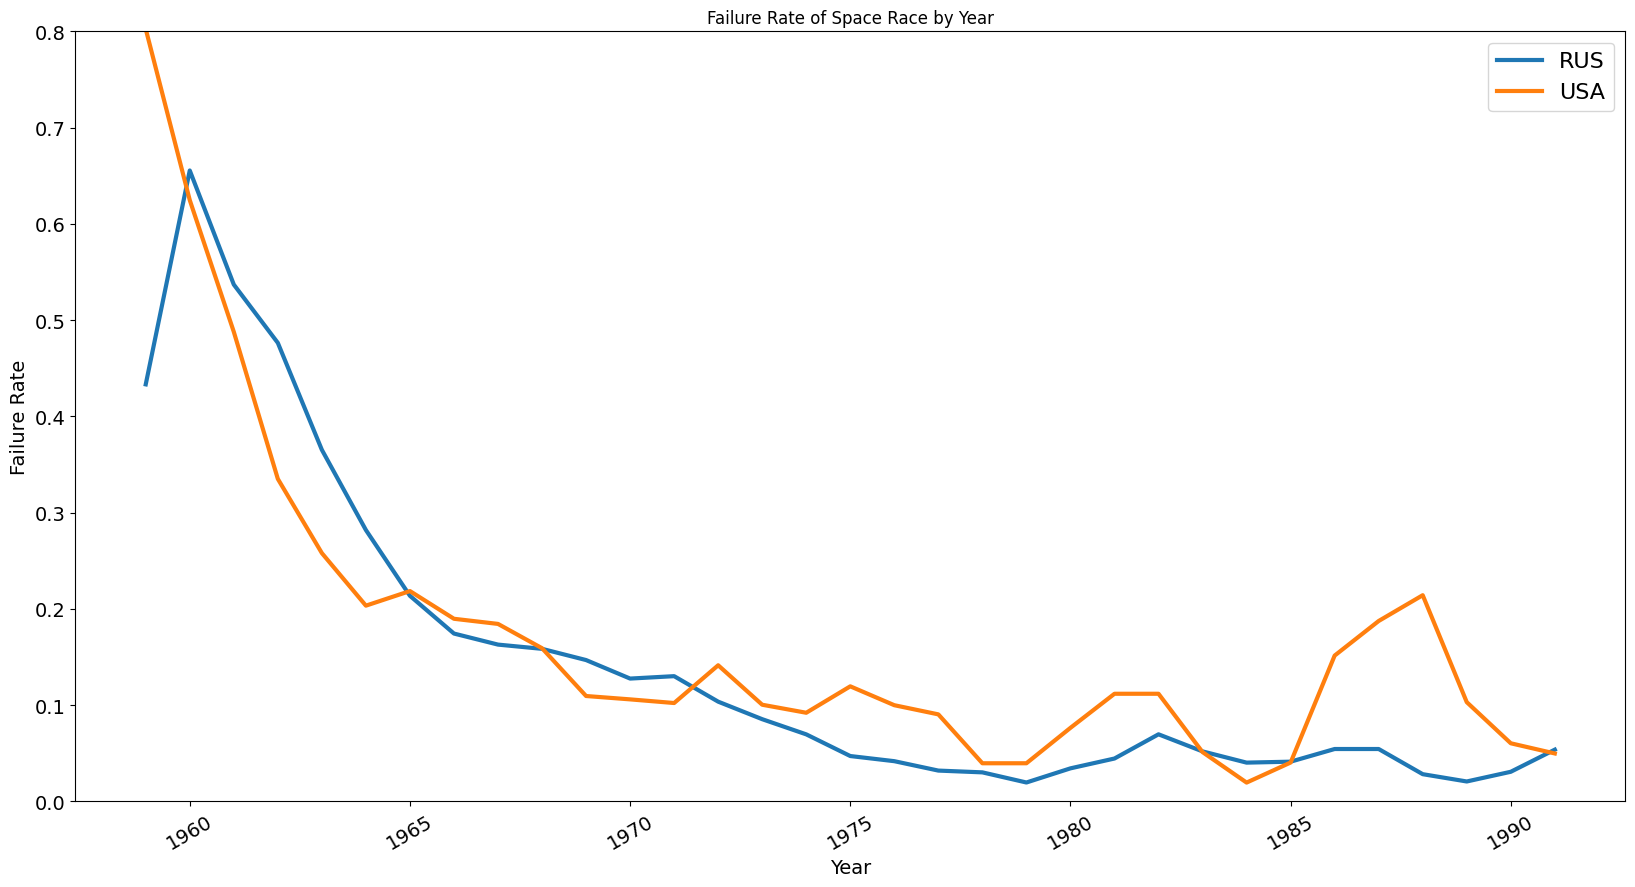

In [ ]:
rolled_df = df_failure_rate.rolling(window=3).mean()

plt.figure(figsize=(20,10))
plt.title("Failure Rate of Space Race by Year")
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Failure Rate", fontsize=14)
plt.ylim(0,0.8)

for column in rolled_df.columns:
  plt.plot(rolled_df.index, rolled_df[column],
           linewidth=3, label=rolled_df[column].name)

plt.legend(fontsize=16)

Both have significantly reduced their failure rate over time, at about the same rate.